In [ ]:
with arcpy.EnvManager(outputCoordinateSystem='PROJCS["WGS_1984_UTM_Zone_43N",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",75.0],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0]]', extent='259023 2061053 338623 2162253 PROJCS["WGS_1984_UTM_Zone_43N",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",75.0],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0]]'):
    arcpy.management.Clip("inunriver_rcp4p5_00000NorESM1-M_2050_rp00002.tif", "259023 2061053 338623 2162253", r"C:\Users\Quint\Documents\ArcGIS\Projects\rainfall_data\rainfall_data.gdb\inunriver_rcp4p5_00000N_Clip", "mmr_landuse_2016_final.tif", "-1", "NONE", "NO_MAINTAIN_EXTENT")

In [209]:
import arcpy
import os
import rasterio as rio
from osgeo import gdal
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import seaborn as sns
import geopandas
import matplotlib.pyplot as plt
import rasterio
import rasterio.plot
import matplotlib.colors as colors

In [210]:
path='E:\program'
os.chdir(path)

In [ ]:
inputFolder=r'rainfall_data'
for file in os.listdir(inputFolder):
    input_file=os.path.join(r'rainfall_data', file)
    output_file=os.path.join(r'clipped_rasters', file)
    with arcpy.EnvManager(outputCoordinateSystem='PROJCS["WGS_1984_UTM_Zone_43N",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",75.0],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0]]', extent='259023 2061053 338623 2162253 PROJCS["WGS_1984_UTM_Zone_43N",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",75.0],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0]]'):
        arcpy.management.Clip(input_file, "259023 2061053 338623 2162253", output_file, "mmr_landuse_2016_final.tif", "-1", "NONE", "NO_MAINTAIN_EXTENT")

In [4]:
inputFolder=r'clipped_rasters'
for file in os.listdir(inputFolder):
    if file.endswith('tif'):
        input_file=os.path.join(r'clipped_rasters', file)
        output_file=os.path.join(r'final_rasters', file)
        with arcpy.EnvManager(outputCoordinateSystem='PROJCS["WGS_1984_UTM_Zone_43N",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",75.0],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0]]', extent='259023 2061053 338623 2162253 PROJCS["WGS_1984_UTM_Zone_43N",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",75.0],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0]]'):
            arcpy.management.Resample(input_file, output_file, "200 200", "BILINEAR")

In [6]:
inputFolder=r'final_rasters'
for file in os.listdir(inputFolder):
    if file.endswith('tif'):
        print(file)

inunriver_rcp4p5_00000NorESM1-M_2050_rp00002.tif
inunriver_rcp4p5_00000NorESM1-M_2050_rp00010.tif
inunriver_rcp4p5_00000NorESM1-M_2050_rp00005.tif
inunriver_rcp4p5_00000NorESM1-M_2050_rp00025.tif
inunriver_rcp4p5_00000NorESM1-M_2050_rp00050.tif
inunriver_rcp4p5_00000NorESM1-M_2050_rp00100.tif
inunriver_rcp4p5_00000NorESM1-M_2050_rp00250.tif
inunriver_rcp4p5_00000NorESM1-M_2050_rp00500.tif
inunriver_rcp4p5_00000NorESM1-M_2050_rp01000.tif
inunriver_rcp4p5_0000GFDL-ESM2M_2050_rp00002.tif
inunriver_rcp4p5_0000GFDL-ESM2M_2050_rp00005.tif
inunriver_rcp4p5_0000GFDL-ESM2M_2050_rp00010.tif
inunriver_rcp4p5_0000GFDL-ESM2M_2050_rp00025.tif
inunriver_rcp4p5_0000GFDL-ESM2M_2050_rp00050.tif
inunriver_rcp4p5_0000GFDL-ESM2M_2050_rp00100.tif
inunriver_rcp4p5_0000GFDL-ESM2M_2050_rp00250.tif
inunriver_rcp4p5_0000GFDL-ESM2M_2050_rp00500.tif
inunriver_rcp4p5_0000GFDL-ESM2M_2050_rp01000.tif
inunriver_rcp4p5_0000HadGEM2-ES_2050_rp00002.tif
inunriver_rcp4p5_0000HadGEM2-ES_2050_rp00005.tif
inunriver_rcp4p5_000

In [18]:
def func(inputFolder):
    j=0
    df=pd.DataFrame(columns=['fraction inundated','average inundation','name'], index=['2','5','10','25','50','100','250','500','1000'])
    for i in range(45):
        file=os.path.join(inputFolder,os.listdir(inputFolder)[i])
        if file.endswith('tif'):
            with rio.open(file) as dem_src:
                raster_file = dem_src.read(1)
                raster = gdal.Open(file)
                projection = raster.GetProjection()
                geotransform = raster.GetGeoTransform()
                df.iloc[j,0]=(raster_file > 0).sum()/(len(raster_file)*len(raster_file[1]))
                df.iloc[j,1]=(raster_file[raster_file>0]).mean()
                df.iloc[j,2]=os.listdir(inputFolder)[i]
                j+=1
    return df

In [19]:
df_1_low=func(r'final_rasters\model_1_low')
df_2_low=func(r'final_rasters\model_2_low')
df_3_low=func(r'final_rasters\model_3_low')
df_4_low=func(r'final_rasters\model_4_low')
df_5_low=func(r'final_rasters\model_5_low')

In [20]:
df_1_low

,fraction inundated,average inundation,name
2,0.088612,0.147269,inunriver_rcp4p5_00000NorESM1-M_2050_rp00002.tif
5,0.104533,0.475867,inunriver_rcp4p5_00000NorESM1-M_2050_rp00005.tif
10,0.11314,0.672428,inunriver_rcp4p5_00000NorESM1-M_2050_rp00010.tif
25,0.119866,0.921064,inunriver_rcp4p5_00000NorESM1-M_2050_rp00025.tif
50,0.123348,1.113517,inunriver_rcp4p5_00000NorESM1-M_2050_rp00050.tif
100,0.128081,1.281791,inunriver_rcp4p5_00000NorESM1-M_2050_rp00100.tif
250,0.131563,1.516608,inunriver_rcp4p5_00000NorESM1-M_2050_rp00250.tif
500,0.133675,1.691725,inunriver_rcp4p5_00000NorESM1-M_2050_rp00500.tif
1000,0.13508,1.870278,inunriver_rcp4p5_00000NorESM1-M_2050_rp01000.tif


In [22]:
df_2_low

,fraction inundated,average inundation,name
2,0.099479,0.389265,inunriver_rcp4p5_0000GFDL-ESM2M_2050_rp00002.tif
5,0.117106,0.793279,inunriver_rcp4p5_0000GFDL-ESM2M_2050_rp00005.tif
10,0.122834,1.064002,inunriver_rcp4p5_0000GFDL-ESM2M_2050_rp00010.tif
25,0.129639,1.377687,inunriver_rcp4p5_0000GFDL-ESM2M_2050_rp00025.tif
50,0.13279,1.618577,inunriver_rcp4p5_0000GFDL-ESM2M_2050_rp00050.tif
100,0.134956,1.859926,inunriver_rcp4p5_0000GFDL-ESM2M_2050_rp00100.tif
250,0.138681,2.151558,inunriver_rcp4p5_0000GFDL-ESM2M_2050_rp00250.tif
500,0.142712,2.341141,inunriver_rcp4p5_0000GFDL-ESM2M_2050_rp00500.tif
1000,0.146589,2.522868,inunriver_rcp4p5_0000GFDL-ESM2M_2050_rp01000.tif


In [23]:
df_3_low

,fraction inundated,average inundation,name
2,0.095804,0.33736,inunriver_rcp4p5_0000HadGEM2-ES_2050_rp00002.tif
5,0.115588,0.742864,inunriver_rcp4p5_0000HadGEM2-ES_2050_rp00005.tif
10,0.122136,1.006358,inunriver_rcp4p5_0000HadGEM2-ES_2050_rp00010.tif
25,0.129125,1.368239,inunriver_rcp4p5_0000HadGEM2-ES_2050_rp00025.tif
50,0.132666,1.632243,inunriver_rcp4p5_0000HadGEM2-ES_2050_rp00050.tif
100,0.135609,1.887159,inunriver_rcp4p5_0000HadGEM2-ES_2050_rp00100.tif
250,0.140451,2.191374,inunriver_rcp4p5_0000HadGEM2-ES_2050_rp00250.tif
500,0.143849,2.411875,inunriver_rcp4p5_0000HadGEM2-ES_2050_rp00500.tif
1000,0.147465,2.617799,inunriver_rcp4p5_0000HadGEM2-ES_2050_rp01000.tif


In [24]:
df_4_low

,fraction inundated,average inundation,name
2,0.092604,0.247235,inunriver_rcp4p5_00IPSL-CM5A-LR_2050_rp00002.tif
5,0.112145,0.621538,inunriver_rcp4p5_00IPSL-CM5A-LR_2050_rp00005.tif
10,0.118674,0.864708,inunriver_rcp4p5_00IPSL-CM5A-LR_2050_rp00010.tif
25,0.125237,1.163498,inunriver_rcp4p5_00IPSL-CM5A-LR_2050_rp00025.tif
50,0.129639,1.385039,inunriver_rcp4p5_00IPSL-CM5A-LR_2050_rp00050.tif
100,0.132711,1.610664,inunriver_rcp4p5_00IPSL-CM5A-LR_2050_rp00100.tif
250,0.13554,1.907631,inunriver_rcp4p5_00IPSL-CM5A-LR_2050_rp00250.tif
500,0.138606,2.109,inunriver_rcp4p5_00IPSL-CM5A-LR_2050_rp00500.tif
1000,0.141673,2.30116,inunriver_rcp4p5_00IPSL-CM5A-LR_2050_rp01000.tif


In [25]:
df_5_low

,fraction inundated,average inundation,name
2,0.086031,0.032067,inunriver_rcp4p5_MIROC-ESM-CHEM_2050_rp00002.tif
5,0.095433,0.328136,inunriver_rcp4p5_MIROC-ESM-CHEM_2050_rp00005.tif
10,0.105345,0.487545,inunriver_rcp4p5_MIROC-ESM-CHEM_2050_rp00010.tif
25,0.113713,0.684798,inunriver_rcp4p5_MIROC-ESM-CHEM_2050_rp00025.tif
50,0.118189,0.829467,inunriver_rcp4p5_MIROC-ESM-CHEM_2050_rp00050.tif
100,0.121004,0.975501,inunriver_rcp4p5_MIROC-ESM-CHEM_2050_rp00100.tif
250,0.12499,1.155077,inunriver_rcp4p5_MIROC-ESM-CHEM_2050_rp00250.tif
500,0.128081,1.282958,inunriver_rcp4p5_MIROC-ESM-CHEM_2050_rp00500.tif
1000,0.129714,1.420665,inunriver_rcp4p5_MIROC-ESM-CHEM_2050_rp01000.tif


In [75]:
def func(z,jaar):
    all_models=[]
    for y in range(506):
        b= []
        for x in range(398):
            b.append([0,0,0,0,0])
        all_models.append(b)
        
    avg_models_low=[]
    for y in range(506):
        b= []
        for x in range(398):
            b.append(0)
        avg_models_low.append(b)
    avg_models_low=np.array(avg_models_low, dtype = float)

    for count, folder in enumerate(os.listdir(r'final_rasters\low')):
        folder2=os.path.join(r'final_rasters\low',folder)
        file=os.path.join(folder2,os.listdir(folder2)[z])
        print(file)
        if file.endswith('tif'):
            with rio.open(file) as dem_src:
                raster_file = dem_src.read(1)  
                for i in range(506):
                    for j in range(398):
                        all_models[i][j][count]=raster_file[i][j]
                        
    for i in range(506):
        for j in range(398):
            avg_models_low[i][j]=np.mean(all_models[i][j])

    with rio.open(r'mmr_landuse_2016_final.tif') as dem_src:
        raster = gdal.Open(file)
        projection = raster.GetProjection()
        geotrans = raster.GetGeoTransform()
    outputPath = os.path.join(r'combined_rasters','avg_models_low_'+ str(jaar) +'.tif')
    print(outputPath)
    cv2.imwrite(outputPath, avg_models_low)
    dataset2 = gdal.Open(outputPath, gdal.GA_Update)
    dataset2.SetGeoTransform(geotrans)
    dataset2.SetProjection(projection)
    return avg_models_low  

In [76]:
avg_models_low_2=func(1,2)
avg_models_low_5=func(6,5)
avg_models_low_10=func(11,10)
avg_models_low_25=func(16,25)
avg_models_low_50=func(21,50)
avg_models_low_100=func(26,100)
avg_models_low_250=func(31,250)
avg_models_low_500=func(36,500)
avg_models_low_1000=func(41,1000)

final_rasters\low\model_5_low\inunriver_rcp4p5_MIROC-ESM-CHEM_2050_rp00002.tif
final_rasters\low\model_1_low\inunriver_rcp4p5_00000NorESM1-M_2050_rp00002.tif
final_rasters\low\model_3_low\inunriver_rcp4p5_0000HadGEM2-ES_2050_rp00002.tif
final_rasters\low\model_4_low\inunriver_rcp4p5_00IPSL-CM5A-LR_2050_rp00002.tif
final_rasters\low\model_2_low\inunriver_rcp4p5_0000GFDL-ESM2M_2050_rp00002.tif
combined_rasters\avg_models_low_2.tif
final_rasters\low\model_5_low\inunriver_rcp4p5_MIROC-ESM-CHEM_2050_rp00005.tif
final_rasters\low\model_1_low\inunriver_rcp4p5_00000NorESM1-M_2050_rp00005.tif
final_rasters\low\model_3_low\inunriver_rcp4p5_0000HadGEM2-ES_2050_rp00005.tif
final_rasters\low\model_4_low\inunriver_rcp4p5_00IPSL-CM5A-LR_2050_rp00005.tif
final_rasters\low\model_2_low\inunriver_rcp4p5_0000GFDL-ESM2M_2050_rp00005.tif
combined_rasters\avg_models_low_5.tif
final_rasters\low\model_5_low\inunriver_rcp4p5_MIROC-ESM-CHEM_2050_rp00010.tif
final_rasters\low\model_1_low\inunriver_rcp4p5_00000Nor

### Export zoning low

In [77]:
file_path=r'mmr_landuse_2016_final.tif'
with rio.open(file_path) as dem_src:
    luc_mmr = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotrans = luc.GetGeoTransform()

In [78]:
with rio.open(r'combined_rasters\low\avg_models_low_100.tif') as dem_src:
    raster_file = dem_src.read(1)  

In [79]:
raster_file

array([[-1., -1., -1., ...,  0.,  0.,  0.],
       [-1., -1., -1., ...,  0.,  0.,  0.],
       [-1., -1., -1., ...,  0.,  0.,  0.],
       ...,
       [-1., -1., -1., ...,  0.,  0.,  0.],
       [-1., -1., -1., ...,  0.,  0.,  0.],
       [-1., -1., -1., ...,  0.,  0.,  0.]])

In [80]:
for i in range(len(raster_file)):
    for j in range(len(raster_file[1])):
        if raster_file[i][j]>0:
            raster_file[i][j]=1
        else:
            raster_file[i][j]=0

In [81]:
raster_file=raster_file.astype(int)

In [82]:
outputPath=r'zoning_rasters\avg_models_low_100.tif'
cv2.imwrite(outputPath, raster_file)
dataset2 = gdal.Open(outputPath, gdal.GA_Update)
dataset2.SetGeoTransform(geotrans)
dataset2.SetProjection(projection)

0

## High 

In [83]:
df_1_high=func(r'final_rasters\model_1_high')
df_2_high=func(r'final_rasters\model_2_high')
df_3_high=func(r'final_rasters\model_3_high')
df_4_high=func(r'final_rasters\model_4_high')
df_5_high=func(r'final_rasters\model_5_high')

TypeError: func() missing 1 required positional argument: 'jaar'

In [31]:
df_1_high

,fraction inundated,average inundation,name
2,0.087435,0.085682,inunriver_rcp8p5_00000NorESM1-M_2050_rp00002.tif
5,0.098059,0.363708,inunriver_rcp8p5_00000NorESM1-M_2050_rp00005.tif
10,0.106146,0.522222,inunriver_rcp8p5_00000NorESM1-M_2050_rp00010.tif
25,0.1149,0.703681,inunriver_rcp8p5_00000NorESM1-M_2050_rp00025.tif
50,0.118486,0.845044,inunriver_rcp8p5_00000NorESM1-M_2050_rp00050.tif
100,0.121295,0.983044,inunriver_rcp8p5_00000NorESM1-M_2050_rp00100.tif
250,0.124827,1.156996,inunriver_rcp8p5_00000NorESM1-M_2050_rp00250.tif
500,0.127958,1.281797,inunriver_rcp8p5_00000NorESM1-M_2050_rp00500.tif
1000,0.130075,1.415074,inunriver_rcp8p5_00000NorESM1-M_2050_rp01000.tif


In [32]:
df_2_high

,fraction inundated,average inundation,name
2,0.108377,0.538918,inunriver_rcp8p5_0000GFDL-ESM2M_2050_rp00002.tif
5,0.123056,1.094745,inunriver_rcp8p5_0000GFDL-ESM2M_2050_rp00005.tif
10,0.130228,1.435217,inunriver_rcp8p5_0000GFDL-ESM2M_2050_rp00010.tif
25,0.135263,1.87525,inunriver_rcp8p5_0000GFDL-ESM2M_2050_rp00025.tif
50,0.139536,2.173716,inunriver_rcp8p5_0000GFDL-ESM2M_2050_rp00050.tif
100,0.144853,2.434164,inunriver_rcp8p5_0000GFDL-ESM2M_2050_rp00100.tif
250,0.150477,2.781563,inunriver_rcp8p5_0000GFDL-ESM2M_2050_rp00250.tif
500,0.155255,3.019711,inunriver_rcp8p5_0000GFDL-ESM2M_2050_rp00500.tif
1000,0.15935,3.256449,inunriver_rcp8p5_0000GFDL-ESM2M_2050_rp01000.tif


In [33]:
df_3_high

,fraction inundated,average inundation,name
2,0.100176,0.400972,inunriver_rcp8p5_0000HadGEM2-ES_2050_rp00002.tif
5,0.117438,0.820646,inunriver_rcp8p5_0000HadGEM2-ES_2050_rp00005.tif
10,0.123897,1.099268,inunriver_rcp8p5_0000HadGEM2-ES_2050_rp00010.tif
25,0.130307,1.464041,inunriver_rcp8p5_0000HadGEM2-ES_2050_rp00025.tif
50,0.133878,1.726902,inunriver_rcp8p5_0000HadGEM2-ES_2050_rp00050.tif
100,0.136742,1.982965,inunriver_rcp8p5_0000HadGEM2-ES_2050_rp00100.tif
250,0.142158,2.278365,inunriver_rcp8p5_0000HadGEM2-ES_2050_rp00250.tif
500,0.145699,2.495757,inunriver_rcp8p5_0000HadGEM2-ES_2050_rp00500.tif
1000,0.148805,2.710468,inunriver_rcp8p5_0000HadGEM2-ES_2050_rp01000.tif


In [34]:
df_4_high

,fraction inundated,average inundation,name
2,0.100339,0.410236,inunriver_rcp8p5_00IPSL-CM5A-LR_2050_rp00002.tif
5,0.120425,0.943777,inunriver_rcp8p5_00IPSL-CM5A-LR_2050_rp00005.tif
10,0.127745,1.282319,inunriver_rcp8p5_00IPSL-CM5A-LR_2050_rp00010.tif
25,0.133799,1.7186,inunriver_rcp8p5_00IPSL-CM5A-LR_2050_rp00025.tif
50,0.137494,2.037708,inunriver_rcp8p5_00IPSL-CM5A-LR_2050_rp00050.tif
100,0.142351,2.318858,inunriver_rcp8p5_00IPSL-CM5A-LR_2050_rp00100.tif
250,0.148617,2.663035,inunriver_rcp8p5_00IPSL-CM5A-LR_2050_rp00250.tif
500,0.152881,2.913172,inunriver_rcp8p5_00IPSL-CM5A-LR_2050_rp00500.tif
1000,0.157154,3.149276,inunriver_rcp8p5_00IPSL-CM5A-LR_2050_rp01000.tif


In [35]:
df_5_high

,fraction inundated,average inundation,name
2,0.08703,0.061994,inunriver_rcp8p5_MIROC-ESM-CHEM_2050_rp00002.tif
5,0.09612,0.350413,inunriver_rcp8p5_MIROC-ESM-CHEM_2050_rp00005.tif
10,0.105824,0.504699,inunriver_rcp8p5_MIROC-ESM-CHEM_2050_rp00010.tif
25,0.114406,0.693042,inunriver_rcp8p5_MIROC-ESM-CHEM_2050_rp00025.tif
50,0.118239,0.839806,inunriver_rcp8p5_MIROC-ESM-CHEM_2050_rp00050.tif
100,0.121122,0.983689,inunriver_rcp8p5_MIROC-ESM-CHEM_2050_rp00100.tif
250,0.125237,1.160122,inunriver_rcp8p5_MIROC-ESM-CHEM_2050_rp00250.tif
500,0.128081,1.28894,inunriver_rcp8p5_MIROC-ESM-CHEM_2050_rp00500.tif
1000,0.129832,1.424054,inunriver_rcp8p5_MIROC-ESM-CHEM_2050_rp01000.tif


In [84]:
def func_high(z,jaar):
    all_models=[]
    for y in range(506):
        b= []
        for x in range(398):
            b.append([0,0,0,0,0])
        all_models.append(b)
        
    avg_models_high=[]
    for y in range(506):
        b= []
        for x in range(398):
            b.append(0)
        avg_models_high.append(b)
    avg_models_high=np.array(avg_models_high, dtype = float)

    for count, folder in enumerate(os.listdir(r'final_rasters\high')):
        folder2=os.path.join(r'final_rasters\high',folder)
        file=os.path.join(folder2,os.listdir(folder2)[z])
        print(file)
        if file.endswith('tif'):
            with rio.open(file) as dem_src:
                raster_file = dem_src.read(1)  
                for i in range(506):
                    for j in range(398):
                        all_models[i][j][count]=raster_file[i][j]
                        
    for i in range(506):
        for j in range(398):
            avg_models_high[i][j]=np.mean(all_models[i][j])

    with rio.open(r'mmr_landuse_2016_final.tif') as dem_src:
        raster = gdal.Open(file)
        projection = raster.GetProjection()
        geotrans = raster.GetGeoTransform()
    outputPath = os.path.join(r'combined_rasters','avg_models_high_'+ str(jaar) +'.tif')
    print(outputPath)
    cv2.imwrite(outputPath, avg_models_high)
    dataset2 = gdal.Open(outputPath, gdal.GA_Update)
    dataset2.SetGeoTransform(geotrans)
    dataset2.SetProjection(projection)
    return avg_models_high  

In [85]:
avg_models_high_2=func_high(1,2)
avg_models_high_5=func_high(6,5)
avg_models_high_10=func_high(11,10)
avg_models_high_25=func_high(16,25)
avg_models_high_50=func_high(21,50)
avg_models_high_100=func_high(26,100)
avg_models_high_250=func_high(31,250)
avg_models_high_500=func_high(36,500)
avg_models_high_1000=func_high(41,1000)

final_rasters\high\model_5_high\inunriver_rcp8p5_MIROC-ESM-CHEM_2050_rp00002.tif
final_rasters\high\model_1_high\inunriver_rcp8p5_00000NorESM1-M_2050_rp00002.tif
final_rasters\high\model_2_high\inunriver_rcp8p5_0000GFDL-ESM2M_2050_rp00002.tif
final_rasters\high\model_3_high\inunriver_rcp8p5_0000HadGEM2-ES_2050_rp00002.tif
final_rasters\high\model_4_high\inunriver_rcp8p5_00IPSL-CM5A-LR_2050_rp00002.tif
combined_rasters\avg_models_high_2.tif
final_rasters\high\model_5_high\inunriver_rcp8p5_MIROC-ESM-CHEM_2050_rp00005.tif
final_rasters\high\model_1_high\inunriver_rcp8p5_00000NorESM1-M_2050_rp00005.tif
final_rasters\high\model_2_high\inunriver_rcp8p5_0000GFDL-ESM2M_2050_rp00005.tif
final_rasters\high\model_3_high\inunriver_rcp8p5_0000HadGEM2-ES_2050_rp00005.tif
final_rasters\high\model_4_high\inunriver_rcp8p5_00IPSL-CM5A-LR_2050_rp00005.tif
combined_rasters\avg_models_high_5.tif
final_rasters\high\model_5_high\inunriver_rcp8p5_MIROC-ESM-CHEM_2050_rp00010.tif
final_rasters\high\model_1_high

### Export 100-year return period high

In [86]:
file_path=r'mmr_landuse_2016_final.tif'
with rio.open(file_path) as dem_src:
    luc_mmr = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotrans = luc.GetGeoTransform()

In [88]:
with rio.open(r'combined_rasters\high\avg_models_high_100.tif') as dem_src:
    raster_file = dem_src.read(1)  

In [89]:
raster_file

array([[-1., -1., -1., ...,  0.,  0.,  0.],
       [-1., -1., -1., ...,  0.,  0.,  0.],
       [-1., -1., -1., ...,  0.,  0.,  0.],
       ...,
       [-1., -1., -1., ...,  0.,  0.,  0.],
       [-1., -1., -1., ...,  0.,  0.,  0.],
       [-1., -1., -1., ...,  0.,  0.,  0.]])

In [90]:
for i in range(len(raster_file)):
    for j in range(len(raster_file[1])):
        if raster_file[i][j]>0:
            raster_file[i][j]=1
        else:
            raster_file[i][j]=0

In [91]:
raster_file=raster_file.astype(int)

In [93]:
outputPath=r'zoning_rasters\avg_models_high_100.tif'
cv2.imwrite(outputPath, raster_file)
dataset2 = gdal.Open(outputPath, gdal.GA_Update)
dataset2.SetGeoTransform(geotrans)
dataset2.SetProjection(projection)

0

## spatially explicit AED

In [211]:
file_path=r'base_case_raster_2.tif'
with rio.open(file_path) as dem_src:
    luc_mmr = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

In [212]:
def func_spat_expl_aed(lu_file_path,climate_folder,output_name):    
    area=0
    with rio.open(lu_file_path) as dem_src:
        luc=gdal.Open(lu_file_path)
        projection = luc.GetProjection()
        geotrans = luc.GetGeoTransform()
    dam_all_rp=[]
    for y in range(506):
        b= []
        for x in range(398):
            b.append([0,0,0,0,0,0,0,0,0])
        dam_all_rp.append(b)
    damage_raster=[]
    for y in range(506):
        b= []
        for x in range(398):
            b.append(0)
        damage_raster.append(b)
    for count,file in enumerate(winsort(os.listdir(climate_folder))):
        file_path=os.path.join(climate_folder,file)
        print(count)
        with rio.open(file_path) as dem_src:
            flood = dem_src.read(1)
            for i in range(len(luc_mmr)):
                for j in range(len(luc_mmr[1])):
                    if flood[i][j]>0:
                        D=flood[i][j]
                        if luc_mmr[i][j]==2:#industry
                            y=4*10**4*(65.51*D**0.42)
                            dam_all_rp[i][j][count]=y
                            if count==8:
                                damage=dam_all_rp[i][j]
                                damage.reverse()
                                aep=[0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5]
                                rc=(damage[-1]-damage[-2])/(aep[-1]-aep[-2])
                                aep=[0,0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5,1]
                                damage.append(max(0,damage[-1]+rc*((aep[-1]-aep[-2])))) #damage at p=1
                                damage.insert(0,1.5*damage[1])
                                ead=auc(aep,damage)
                                damage_raster[i][j]=ead
                        elif luc_mmr[i][j]==5:#urban-formal
                            y=4*10**4*(35.18*D**0.4)
                            dam_all_rp[i][j][count]=y
                            if count==8:
                                damage=dam_all_rp[i][j]
                                damage.reverse()
                                aep=[0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5]
                                rc=(damage[-1]-damage[-2])/(aep[-1]-aep[-2])
                                aep=[0,0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5,1]
                                damage.append(max(0,damage[-1]+rc*((aep[-1]-aep[-2])))) #damage at p=1
                                damage.insert(0,1.5*damage[1])
                                ead=auc(aep,damage)
                                damage_raster[i][j]=ead                            
                        elif luc_mmr[i][j]==6:#urban-informal
                            y=4*10**4*(21.99*D**0.4)
                            dam_all_rp[i][j][count]=y
                            if count==8:
                                damage=dam_all_rp[i][j]
                                damage.reverse()
                                aep=[0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5]
                                rc=(damage[-1]-damage[-2])/(aep[-1]-aep[-2])
                                aep=[0,0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5,1]
                                damage.append(max(0,damage[-1]+rc*((aep[-1]-aep[-2])))) #damage at p=1
                                damage.insert(0,1.5*damage[1])
                                ead=auc(aep,damage)
                                damage_raster[i][j]=ead
                        elif luc_mmr[i][j]==7:#urban-villages
                            y=4*10**4*(19.35*D**0.4)
                            dam_all_rp[i][j][count]=y
                            if count==8:
                                damage=dam_all_rp[i][j]
                                damage.reverse()
                                aep=[0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5]
                                rc=(damage[-1]-damage[-2])/(aep[-1]-aep[-2])
                                aep=[0,0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5,1]
                                damage.append(max(0,damage[-1]+rc*((aep[-1]-aep[-2])))) #damage at p=1
                                damage.insert(0,1.5*damage[1])
                                ead=auc(aep,damage)
                                damage_raster[i][j]=ead
                        elif luc_mmr[i][j]==8:#transportation
                            y=4*10**4*(max(0,5.38*np.log(D)**2+89.58*np.log(D)+211.09))
                            dam_all_rp[i][j][count]=y
                            if count==8:
                                damage=dam_all_rp[i][j]
                                damage.reverse()
                                aep=[0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5]
                                rc=(damage[-1]-damage[-2])/(aep[-1]-aep[-2])
                                aep=[0,0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5,1]
                                damage.append(max(0,damage[-1]+rc*((aep[-1]-aep[-2])))) #damage at p=1
                                damage.insert(0,1.5*damage[1])
                                ead=auc(aep,damage)
                                damage_raster[i][j]=ead
    damage_raster=np.array(damage_raster)
    for i in range(len(damage_raster)):
        for j in range(len(damage_raster[1])):
            if damage_raster[i][j]!=0:
                area+=1
                damage_raster[i][j]=np.log10(damage_raster[i][j])
    outputPath = os.path.join(output_name+'.tif')
    cv2.imwrite(outputPath, damage_raster)
    dataset2 = gdal.Open(outputPath, gdal.GA_Update)
    dataset2.SetGeoTransform(geotrans)
    dataset2.SetProjection(projection)
    print(area*40*10**3,"m^2")

### Low AED

In [213]:
func_spat_expl_aed(r'base_case_raster_2.tif',r'combined_rasters\low',r'no_policy_future\ead_spatially_45')

0
1
2
3
4
5
6
7
8
448960000 m^2


In [214]:
raster_path=r"no_policy_future\ead_spatially_45.tif"
with rio.open(raster_path) as dem_src:
    raster = dem_src.read(1) 

In [215]:
raster2=raster

In [216]:
for i in range(len(raster)):
    for j in range(len(raster[1])):
        raster2[i][j]=10**raster2[i][j]

In [217]:
q1=np.amin(raster2)
q2=np.amax(raster2)
plot = ax.pcolor(raster2, norm=colors.LogNorm(vmin=q1, vmax=q2))

In [218]:
q2

5017585.018189725

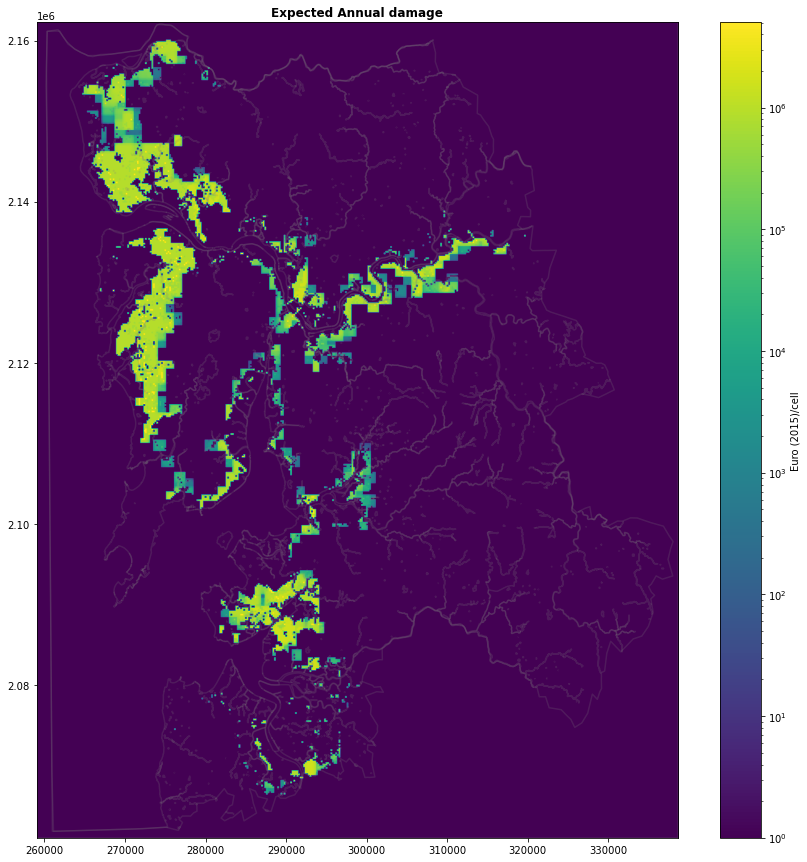

In [220]:
shapefile = geopandas.read_file('mmr_land_use_frame3.shp')
raster = rasterio.open(r"no_policy_future\ead_spatially_45.tif")
fig, ax = plt.subplots(figsize=(15, 15))
rasterio.plot.show(raster, ax=ax,cmap="viridis",title='Expected Annual damage')
shapefile.plot(ax=ax, facecolor='none', edgecolor='grey', alpha=0.2)
#plot = ax.pcolor(raster_path)
cbar=plt.colorbar(plot,ax=ax)
cbar.set_label('Euro (2015)/cell')
plt.savefig('AED.png')

### High

In [221]:
func_spat_expl_aed(r'base_case_raster_2.tif',r'combined_rasters\high',r'no_policy_future\ead_spatially_85')

0
1
2
3
4
5
6
7
8
506520000 m^2


In [222]:
raster_path=r"no_policy_future\ead_spatially_85.tif"
with rio.open(raster_path) as dem_src:
    raster = dem_src.read(1) 

In [223]:
raster2=raster

In [224]:
for i in range(len(raster)):
    for j in range(len(raster[1])):
        raster2[i][j]=10**raster2[i][j]

In [225]:
q2

5017585.018189725

In [226]:
q1=np.amin(raster2)
q2=np.amax(raster2)
plot = ax.pcolor(raster2, norm=colors.LogNorm(vmin=q1, vmax=q2))

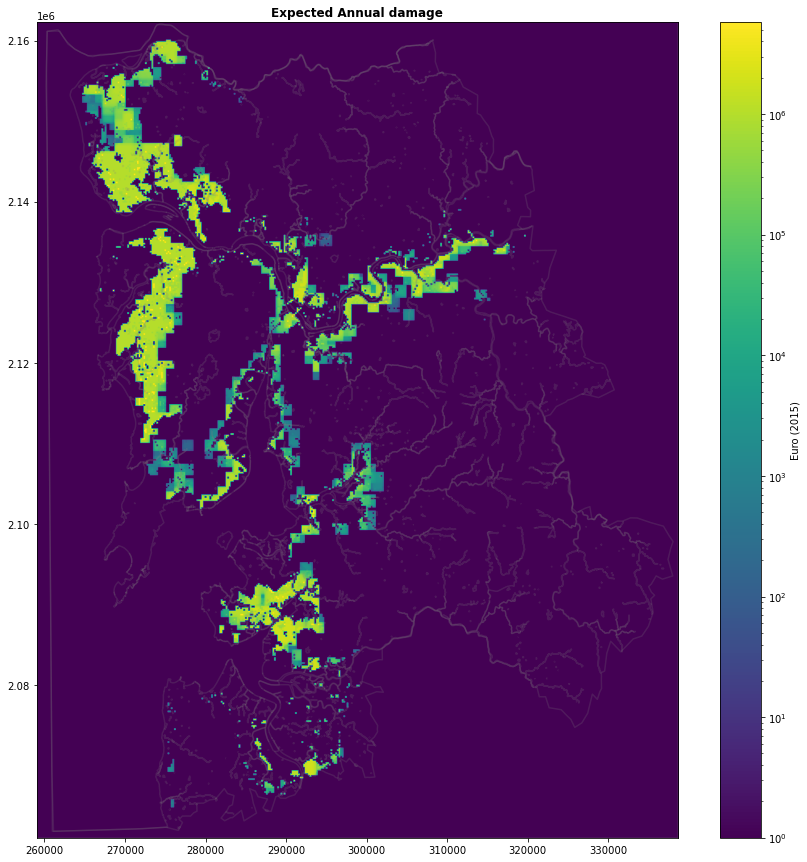

In [227]:
shapefile = geopandas.read_file('mmr_land_use_frame3.shp')
raster = rasterio.open(r"no_policy_future\ead_spatially_85.tif")
fig, ax = plt.subplots(figsize=(15, 15))
rasterio.plot.show(raster, ax=ax,cmap="viridis",title='Expected Annual damage')
shapefile.plot(ax=ax, facecolor='none', edgecolor='grey', alpha=0.2)
#plot = ax.pcolor(raster_path)
cbar=plt.colorbar(plot,ax=ax)
cbar.set_label('Euro (2015)')

## calculate total damage

In [228]:
file_path=r'base_case_raster_2.tif'
with rio.open(file_path) as dem_src:
    luc_mmr = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

In [229]:
from ctypes import wintypes, windll
from functools import cmp_to_key

def winsort(data):
    _StrCmpLogicalW = windll.Shlwapi.StrCmpLogicalW
    _StrCmpLogicalW.argtypes = [wintypes.LPWSTR, wintypes.LPWSTR]
    _StrCmpLogicalW.restype  = wintypes.INT

    cmp_fnc = lambda psz1, psz2: _StrCmpLogicalW(psz1, psz2)
    return sorted(data, key=cmp_to_key(cmp_fnc))

In [230]:
def func_calculate_damage(folder):    
    total_damage_indus=[0,0,0,0,0,0,0,0,0]
    total_damage_urb_for=[0,0,0,0,0,0,0,0,0]
    total_damage_urb_inf=[0,0,0,0,0,0,0,0,0]
    total_damage_urb_vil=[0,0,0,0,0,0,0,0,0]
    total_damage_trans=[0,0,0,0,0,0,0,0,0]
    total_damage=[0,0,0,0,0,0,0,0,0]

    total_indus_unc=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
    total_for_unc=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
    total_inf_unc=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
    total_vil_unc=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
    total_trans_unc=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
    total_unc=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]

    for count,file in enumerate(winsort(os.listdir(folder))):
        file_path=os.path.join(folder,file)
        print(file)
        with rio.open(file_path) as dem_src:
            flood = dem_src.read(1)

        damage_indus=[0,0]
        indus_unc=[0,0]
        damage_urb_for=[0,0]
        form_unc=[0,0]
        damage_urb_inf=[0,0]
        inf_unc=[0,0]
        damage_urb_vil=[0,0]
        vil_unc=[0,0]
        damage_trans=[0,0]
        trans_unc=[0,0]

        for i in range(len(luc_mmr)):
            for j in range(len(luc_mmr[1])):
                if flood[i][j]>0:
                    D=flood[i][j]
                    if luc_mmr[i][j]==2:#industry
                        y=4*10**4*(65.51*D**0.42)
                        damage_indus[0]=damage_indus[0]+y/10**6
                        damage_indus[1]=damage_indus[1]+1

                        y_lower=y-4*10**4*(5.81*D**1.35)
                        indus_unc[0]=indus_unc[0]+y_lower/10**6

                        y_higher=4*10**4*(147.06*D**0.29)-y
                        indus_unc[1]=indus_unc[1]+y_higher/10**6

                    elif luc_mmr[i][j]==5:#urban-formal
                        y=4*10**4*(35.18*D**0.4)
                        damage_urb_for[0]=damage_urb_for[0]+y/10**6
                        damage_urb_for[1]=damage_urb_for[1]+1

                        y_lower=y-4*10**4*(4.64*D**1.14)
                        form_unc[0]=form_unc[0]+y_lower/10**6

                        y_higher=4*10**4*(77.13*D**0.28)-y
                        form_unc[1]=form_unc[1]+y_higher/10**6

                    elif luc_mmr[i][j]==6:#urban-informal
                        y=4*10**4*(21.99*D**0.4)
                        damage_urb_inf[0]=damage_urb_inf[0]+y/10**6
                        damage_urb_inf[1]=damage_urb_inf[1]+1

                        y_lower=y-4*10**4*(2.9*D**1.15)
                        inf_unc[0]=inf_unc[0]+y_lower/10**6

                        y_higher=4*10**4*(48.21*D**0.28)-y
                        inf_unc[1]=inf_unc[1]+y_higher/10**6

                    elif luc_mmr[i][j]==7:#urban-villages
                        y=4*10**4*(19.35*D**0.4)
                        damage_urb_vil[0]=damage_urb_vil[0]+y/10**6
                        damage_urb_vil[1]=damage_urb_vil[1]+1

                        y_lower=y-4*10**4*(2.53*D**1.15)
                        vil_unc[0]=vil_unc[0]+y_lower/10**6

                        y_higher=4*10**4*(42.46*D**0.28)-y
                        vil_unc[1]=vil_unc[1]+y_higher/10**6

                    elif luc_mmr[i][j]==8:#transportation
                        y=4*10**4*(5.38*np.log(D)**2+89.58*np.log(D)+211.09)
                        damage_trans[0]=damage_trans[0]+y/10**6
                        damage_trans[1]=damage_trans[1]+1

                        y_lower=y-4*10**4*(max(0,8.86*np.log(D)**2+129.79*np.log(D)+101.98))
                        trans_unc[0]=trans_unc[0]+y_lower/10**6

                        y_higher=4*10**4*(1.59*np.log(D)**2+49.37*np.log(D)+320.2)-y
                        trans_unc[1]=trans_unc[1]+y_higher/10**6
        total_damage_indus[count]=damage_indus[0]
        total_indus_unc[count][0]=indus_unc[0]
        total_indus_unc[count][1]=indus_unc[1]

        total_damage_urb_for[count]=damage_urb_for[0]
        total_for_unc[count][0]=form_unc[0]
        total_for_unc[count][1]=form_unc[1]


        total_damage_urb_inf[count]=damage_urb_inf[0]
        total_inf_unc[count][0]=inf_unc[0]
        total_inf_unc[count][1]=inf_unc[1]

        total_damage_urb_vil[count]=damage_urb_vil[0]
        total_vil_unc[count][0]=vil_unc[0]
        total_vil_unc[count][1]=vil_unc[1]

        total_damage_trans[count]=damage_trans[0]
        total_trans_unc[count][0]=trans_unc[0]
        total_trans_unc[count][1]=trans_unc[1]

        total_damage[count]=total_damage_indus[count]+total_damage_urb_for[count]+total_damage_urb_inf[count]+total_damage_urb_vil[count]+total_damage_trans[count]
        total_unc[count][0]=total_indus_unc[count][0]+total_for_unc[count][0]+total_inf_unc[count][0]+total_vil_unc[count][0]+total_trans_unc[count][0]
        total_unc[count][1]=total_indus_unc[count][1]+total_for_unc[count][1]+total_inf_unc[count][1]+total_vil_unc[count][1]+total_trans_unc[count][1]
    return total_damage_trans,total_trans_unc

## Low EAD

In [290]:
total_damage_low,total_unc_low=func_calculate_damage(r'combined_rasters\low')

avg_models_low_2.tif
avg_models_low_5.tif
avg_models_low_10.tif
avg_models_low_25.tif
avg_models_low_50.tif
avg_models_low_100.tif
avg_models_low_250.tif
avg_models_low_500.tif
avg_models_low_1000.tif


In [291]:
total_damage_low.reverse()

In [292]:
annual_exceedance_prob=[0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5]

In [293]:
rc=(total_damage_low[-1]-total_damage_low[-2])/(annual_exceedance_prob[-1]-annual_exceedance_prob[-2])

In [294]:
print(rc)

-3541.270025092184


In [295]:
annual_exceedance_prob=[0,0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5,1]

In [296]:
total_damage_low.append(max(0,total_damage_low[-1]+rc*((annual_exceedance_prob[-1]-annual_exceedance_prob[-2])))) #damage at p=1


In [297]:
total_damage_low.insert(0,1.5*total_damage_low[1]) #damage at p=0

In [298]:
total_damage_low

[6721.737394191805,
 4730.653920280731,
 4481.158262794536,
 4150.7553367004,
 3765.9428340206828,
 3454.725794904397,
 3044.852434458721,
 2538.7209631470632,
 2081.8992057459986,
 1019.5181982183435,
 0]

In [299]:
total_unc_low.reverse()
total_unc_low=np.array(total_unc_low)

In [300]:
first_tuples=[]
for element in total_unc_low:
    first_tuples.append(element[0])
annual_exceedance_prob=[0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5]
rc=(first_tuples[-1]-first_tuples[-2])/(annual_exceedance_prob[-1]-annual_exceedance_prob[-2])
annual_exceedance_prob=[0,0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5,1]
first_tuples.append(first_tuples[-1]+rc*((annual_exceedance_prob[-1]-annual_exceedance_prob[-2]))) #damage at p=1
first_tuples.insert(0,1.5*first_tuples[1]) #uncertainty at p=0

In [301]:
first_tuples

[2146.8048626323625,
 1416.4335946637054,
 1431.2032417549085,
 1377.98094269257,
 1386.8792269284568,
 1391.1805371772068,
 1319.5512433807155,
 1331.9946477345252,
 1353.1091497384875,
 1019.5181982183435,
 463.5332790181035]

In [302]:
second_tuples=[]
for element in total_unc_low:
    second_tuples.append(element[1])
annual_exceedance_prob=[0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5]
rc=(second_tuples[-1]-second_tuples[-2])/(annual_exceedance_prob[-1]-annual_exceedance_prob[-2])
annual_exceedance_prob=[0,0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5,1]
second_tuples.append(second_tuples[-1]+rc*((annual_exceedance_prob[-1]-annual_exceedance_prob[-2]))) #damage at p=1
second_tuples.insert(0,1.5*second_tuples[1]) #uncertainty at p=0

In [303]:
for i in range(len(first_tuples)):
    if total_damage_low[i]-first_tuples[i]<0:
        first_tuples[i]=total_damage_low[i]

In [304]:
annual_exceedance_prob=[0,0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5,1]

In [305]:
uncertainties=[first_tuples,second_tuples]

In [306]:
upper_unc=np.add(total_damage_low,second_tuples) #point creation
lower_unc=np.subtract(total_damage_low,first_tuples)

In [307]:
lower_unc=lower_unc.clip(min=0)
upper_unc=upper_unc.clip(min=0)

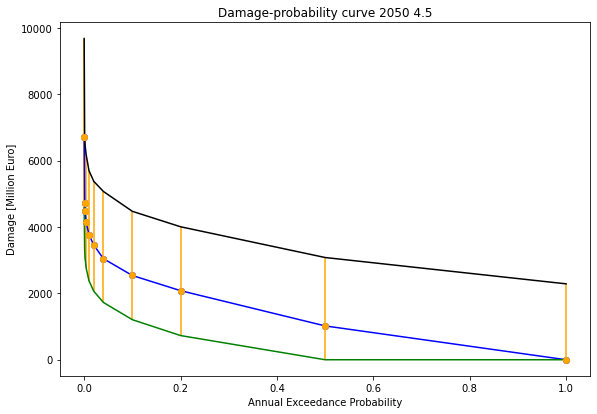

In [308]:
fig, ax = plt.subplots()
plt.scatter(annual_exceedance_prob,total_damage_low, color="blue")
plt.errorbar(annual_exceedance_prob,total_damage_low,yerr=uncertainties, fmt="o", color="orange")
plt.plot(annual_exceedance_prob,total_damage_low, color="blue")
plt.plot(annual_exceedance_prob, upper_unc,color="black")
plt.plot(annual_exceedance_prob, lower_unc, color="green")
#ax.plot(flood_depth, damage_func2, linewidth=2.0)
#ax.plot(flood_depth, damage_func3, linewidth=2.0)
#ax.plot(flood_depth, damage_func4, linewidth=2.0)
#ax.set(xlim=(0, 6), xticks=np.arange(1, 8),
#       ylim=(0, 600), yticks=np.arange(0, 600,30))
#ax.legend(['Logarithmic fit: Y=' + str(round(normal_fit[0],2))+'*log(flood_depth)^2 +'+str(round(normal_fit[1],2))+'*log(flood_depth) +' + str(round(normal_fit[2],2)),
#           'Upper-bound fit: Y=' + str(round(upper_fit[0],2))+'*log(flood_depth)^2 +'+str(round(upper_fit[1],2))+'*log(flood_depth) +' + str(round(upper_fit[2],2)),
#           'Lower-bound fit: Y=Max(0,' + str(round(lower_fit[0],2))+'*log(flood_depth)^2 +'+str(round(lower_fit[1],2))+'*log(flood_depth) +' + str(round(lower_fit[2],2))+')'],loc=2)
plt.xlabel("Annual Exceedance Probability")
plt.ylabel("Damage [Million Euro]")
plt.title("Damage-probability curve 2050 4.5")
fig.set_size_inches(9.5, 6.5)
#fig.savefig('damage_curve_trans.png', dpi=100)
plt.show()

In [309]:
lower_unc

array([4574.93253156, 3314.22032562, 3049.95502104, 2772.77439401,
       2379.06360709, 2063.54525773, 1725.30119108, 1206.72631541,
        728.79005601,    0.        ,    0.        ])

In [310]:
import numpy as np
from sklearn.metrics import auc


print("expected AED is",auc(annual_exceedance_prob,total_damage_low))
print("AED lowerbound is",auc(annual_exceedance_prob,lower_unc))
print("AED upperbound is",auc(annual_exceedance_prob,upper_unc))

expected AED is 1262.4436058207525
AED lowerbound is 382.56156849925867
AED upperbound is 3338.337208696948


## High AED

In [311]:
total_damage_high,total_unc_high=func_calculate_damage(r'combined_rasters\high')

avg_models_high_2.tif
avg_models_high_5.tif
avg_models_high_10.tif
avg_models_high_25.tif
avg_models_high_50.tif
avg_models_high_100.tif
avg_models_high_250.tif
avg_models_high_500.tif
avg_models_high_1000.tif


In [312]:
total_damage_high.reverse()

In [313]:
annual_exceedance_prob=[0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5]

In [314]:
rc=(total_damage_high[-1]-total_damage_high[-2])/(annual_exceedance_prob[-1]-annual_exceedance_prob[-2])

In [315]:
annual_exceedance_prob=[0,0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5,1]

In [316]:
total_damage_high.append(max(0,total_damage_high[-1]+rc*((annual_exceedance_prob[-1]-annual_exceedance_prob[-2])))) #damage at p=1


In [317]:
total_damage_high.insert(0,1.5*total_damage_high[1]) #damage at p=0

In [318]:
total_unc_high.reverse()
total_unc_high=np.array(total_unc_high)

In [319]:
first_tuples=[]
for element in total_unc_high:
    first_tuples.append(element[0])
annual_exceedance_prob=[0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5]
rc=(first_tuples[-1]-first_tuples[-2])/(annual_exceedance_prob[-1]-annual_exceedance_prob[-2])
print(rc)
print(first_tuples[-1])
annual_exceedance_prob=[0,0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5,1]
first_tuples.append(first_tuples[-1]+rc*((annual_exceedance_prob[-1]-annual_exceedance_prob[-2]))) #damage at p=1
first_tuples.insert(0,1.5*first_tuples[1]) #uncertainty at p=0

-244.8018981298613
1309.1847244321134


In [320]:
first_tuples

[2115.5353407969783,
 1496.3477043981811,
 1410.3568938646522,
 1494.544211177236,
 1468.4515231861867,
 1403.439891087518,
 1415.773142326425,
 1369.282308629542,
 1382.6252938710718,
 1309.1847244321134,
 1186.7837753671827]

In [321]:
second_tuples=[]
for element in total_unc_high:
    second_tuples.append(element[1])
annual_exceedance_prob=[0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5]
rc=(second_tuples[-1]-second_tuples[-2])/(annual_exceedance_prob[-1]-annual_exceedance_prob[-2])
annual_exceedance_prob=[0,0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5,1]
second_tuples.append(second_tuples[-1]+rc*((annual_exceedance_prob[-1]-annual_exceedance_prob[-2]))) #damage at p=1
second_tuples.insert(0,1.5*second_tuples[1]) #uncertainty at p=0

In [322]:
for i in range(len(first_tuples)):
    if total_damage_low[i]-first_tuples[i]<0:
        first_tuples[i]=total_damage_low[i]

In [323]:
annual_exceedance_prob=[0,0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5,1]

In [324]:
uncertainties=[first_tuples,second_tuples]

In [325]:
upper_unc=np.add(total_damage_high,second_tuples) #point creation
lower_unc=np.subtract(total_damage_high,first_tuples)

In [326]:
lower_unc=lower_unc.clip(min=0)
upper_unc=upper_unc.clip(min=0)

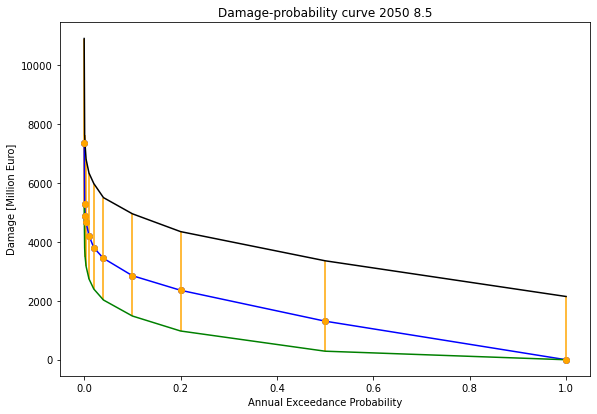

In [327]:
fig, ax = plt.subplots()
plt.scatter(annual_exceedance_prob,total_damage_high, color="blue")
plt.errorbar(annual_exceedance_prob,total_damage_high,yerr=uncertainties, fmt="o", color="orange")
plt.plot(annual_exceedance_prob,total_damage_high, color="blue")
plt.plot(annual_exceedance_prob, upper_unc,color="black")
plt.plot(annual_exceedance_prob, lower_unc, color="green")
#ax.plot(flood_depth, damage_func2, linewidth=2.0)
#ax.plot(flood_depth, damage_func3, linewidth=2.0)
#ax.plot(flood_depth, damage_func4, linewidth=2.0)
#ax.set(xlim=(0, 6), xticks=np.arange(1, 8),
#       ylim=(0, 600), yticks=np.arange(0, 600,30))
#ax.legend(['Logarithmic fit: Y=' + str(round(normal_fit[0],2))+'*log(flood_depth)^2 +'+str(round(normal_fit[1],2))+'*log(flood_depth) +' + str(round(normal_fit[2],2)),
#           'Upper-bound fit: Y=' + str(round(upper_fit[0],2))+'*log(flood_depth)^2 +'+str(round(upper_fit[1],2))+'*log(flood_depth) +' + str(round(upper_fit[2],2)),
#           'Lower-bound fit: Y=Max(0,' + str(round(lower_fit[0],2))+'*log(flood_depth)^2 +'+str(round(lower_fit[1],2))+'*log(flood_depth) +' + str(round(lower_fit[2],2))+')'],loc=2)
plt.xlabel("Annual Exceedance Probability")
plt.ylabel("Damage [Million Euro]")
plt.title("Damage-probability curve 2050 8.5")
fig.set_size_inches(9.5, 6.5)
#fig.savefig('damage_curve_trans.png', dpi=100)
plt.show()

In [187]:
import numpy as np
from sklearn.metrics import auc

print("expected AED is",auc(annual_exceedance_prob,total_damage_high))
print("AED lowerbound is",auc(annual_exceedance_prob,lower_unc))
print("AED upperbound is",auc(annual_exceedance_prob,upper_unc))

expected AED is 1487.3602458657688
AED lowerbound is 180.84480498138845
AED upperbound is 3559.162632365383


## percentage of annual income lost

### slums

In [328]:
inf_monthly_mean_income=2978 #Rs. per household (2002)
inf_monthly_mean_income_2015=7413 #Rs. per household (2015) inflation taken into account https://scripbox.com/plan/inflation-calculator/
inf_monthly_mean_incom_2015_euro=inf_monthly_mean_income_2015*0.0139 #https://www.exchangerates.org.uk/INR-EUR-spot-exchange-rates-history-2015.html
inf_yearly_income=12*inf_monthly_mean_incom_2015_euro
vil_yearly_income=inf_yearly_income

In [329]:
form_monthly_income= 37768 #Mumbai median income 2007-2008=20000 Rs. per household (2015) inflation taken into account https://scripbox.com/plan/inflation-calculator/

In [330]:
form_monthly_income_euro=form_monthly_income*0.0139
form_yearly_income=12*form_monthly_income_euro

In [331]:
form_yearly_income

6299.7024

In [332]:
inf_yearly_income

1236.4883999999997

In [333]:
households_per_cell_inf=((4*10**4)/(1*10**6))*(47*10**3)/4.47 #4.47 people per household 2002 report

In [334]:
households_per_cell_form=((4*10**4)/(1*10**6))*(37*10**3)/4.47

In [335]:
households_per_cell_inf

420.58165548098435

In [336]:
households_per_cell_vil=((4*10**4)/(1*10**6))*(34*10**3)/4.47

In [337]:
def func_spat_expl_lost_annual_income(lu_file_path,climate_folder,output_name):
    with rio.open(lu_file_path) as dem_src:
        luc=gdal.Open(lu_file_path)
        projection = luc.GetProjection()
        geotrans = luc.GetGeoTransform()
    dam_all_rp=[]
    for y in range(506):
        b= []
        for x in range(398):
            b.append([0,0,0,0,0,0,0,0,0])
        dam_all_rp.append(b)
    damage_raster=[]
    for y in range(506):
        b= []
        for x in range(398):
            b.append(0)
        damage_raster.append(b)
    
    urban_formal=[]
    urban_inf=[]
    urban_vil=[]
    urban_formal_zero=[]
    urban_inf_zero=[]
    urban_vil_zero=[]
    for count,file in enumerate(winsort(os.listdir(climate_folder))):
        file_path=os.path.join(climate_folder,file)
        print(count)
        with rio.open(file_path) as dem_src:
            flood = dem_src.read(1)
            for i in range(len(luc_mmr)):
                for j in range(len(luc_mmr[1])):
                    if flood[i][j]>0:
                        D=flood[i][j]
                        if luc_mmr[i][j]==5:#urban-formal
                            y=4*10**4*(35.18*D**0.4)
                            dam_all_rp[i][j][count]=y
                            if count==8:
                                damage=dam_all_rp[i][j]
                                damage.reverse()
                                aep=[0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5]
                                rc=(damage[-1]-damage[-2])/(aep[-1]-aep[-2])
                                aep=[0,0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5,1]
                                damage.append(max(0,damage[-1]+rc*((aep[-1]-aep[-2])))) #damage at p=1
                                damage.insert(0,1.5*damage[1])
                                ead=auc(aep,damage)
                                dam_per_house=ead/households_per_cell_form        
                                damage_raster[i][j]=dam_per_house/form_yearly_income
                                urban_formal.append(damage_raster[i][j])
                        elif luc_mmr[i][j]==6:#urban-informal
                            y=4*10**4*(21.99*D**0.4)
                            dam_all_rp[i][j][count]=y
                            if count==8:
                                damage=dam_all_rp[i][j]
                                damage.reverse()
                                aep=[0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5]
                                rc=(damage[-1]-damage[-2])/(aep[-1]-aep[-2])
                                aep=[0,0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5,1]
                                damage.append(max(0,damage[-1]+rc*((aep[-1]-aep[-2])))) #damage at p=1
                                damage.insert(0,1.5*damage[1])
                                ead=auc(aep,damage)
                                dam_per_house=ead/households_per_cell_inf                                        
                                damage_raster[i][j]=dam_per_house/inf_yearly_income
                                urban_inf.append(damage_raster[i][j])
                        elif luc_mmr[i][j]==7:#urban-villages
                            y=4*10**4*(19.35*D**0.4)
                            dam_all_rp[i][j][count]=y
                            if count==8:
                                damage=dam_all_rp[i][j]
                                damage.reverse()
                                aep=[0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5]
                                rc=(damage[-1]-damage[-2])/(aep[-1]-aep[-2])
                                aep=[0,0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5,1]
                                damage.append(max(0,damage[-1]+rc*((aep[-1]-aep[-2])))) #damage at p=1
                                damage.insert(0,1.5*damage[1])
                                ead=auc(aep,damage)
                                dam_per_house=ead/households_per_cell_vil                                       
                                damage_raster[i][j]=dam_per_house/vil_yearly_income
                                urban_vil.append(damage_raster[i][j])
                    else:
                        if luc_mmr[i][j]==5:
                            urban_formal_zero.append(0)
                        elif luc_mmr[i][j]==6:
                            urban_inf_zero.append(0)
                        elif luc_mmr[i][j]==7:
                            urban_vil_zero.append(0)
    damage_raster=np.array(damage_raster)
#    for i in range(len(damage_raster)):
#        for j in range(len(damage_raster[1])):
#            if damage_raster[i][j]!=0:
#                damage_raster[i][j]=np.log10(damage_raster[i][j])
    outputPath = os.path.join(output_name+'.tif')
    cv2.imwrite(outputPath, damage_raster)
    dataset2 = gdal.Open(outputPath, gdal.GA_Update)
    dataset2.SetGeoTransform(geotrans)
    dataset2.SetProjection(projection)
    return urban_formal, urban_inf, urban_vil, urban_formal_zero, urban_inf_zero, urban_vil_zero

### histogram

### Low

In [339]:
urban_formal, urban_inf, urban_vil,urban_formal_zero, urban_inf_zero, urban_vil_zero=func_spat_expl_lost_annual_income(r'base_case_raster_2.tif',r'combined_rasters\low',r'damage_test\aed_percentage_low')

0
1
2
3
4
5
6
7
8


### fraction of cells affected

In [340]:
frac_urb_form_cells_affected=len(urban_formal)/(len(urban_formal)+len(urban_formal_zero))
frac_urb_form_cells_affected

0.051094317914389564

In [341]:
frac_urb_inf_cells_affected=len(urban_inf)/(len(urban_inf)+len(urban_inf_zero))
frac_urb_inf_cells_affected

0.04832405543053417

In [342]:
frac_urb_vil_cells_affected=len(urban_vil)/(len(urban_vil)+len(urban_vil_zero))
frac_urb_vil_cells_affected

0.02947722707779165

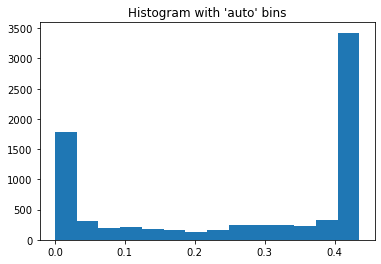

In [343]:
_ = plt.hist(urban_formal, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

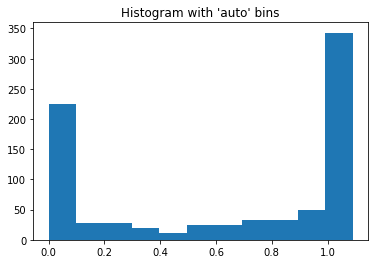

In [344]:
_ = plt.hist(urban_inf, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

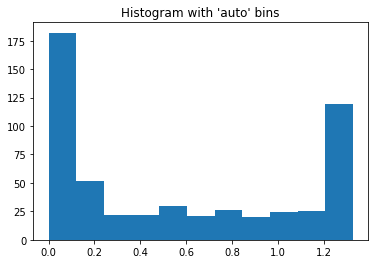

In [345]:
_ = plt.hist(urban_vil, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [346]:
raster_path=r"damage_test\aed_percentage_low.tif"
with rio.open(raster_path) as dem_src:
    raster = dem_src.read(1) 

In [347]:
raster2=raster

In [348]:
for i in range(len(raster)):
    for j in range(len(raster[1])):
        raster2[i][j]=100*raster2[i][j]

In [349]:
q1=np.amin(raster)
q2=np.amax(raster)
plot = ax.pcolor(raster)

In [350]:
q2

132.69278550122144

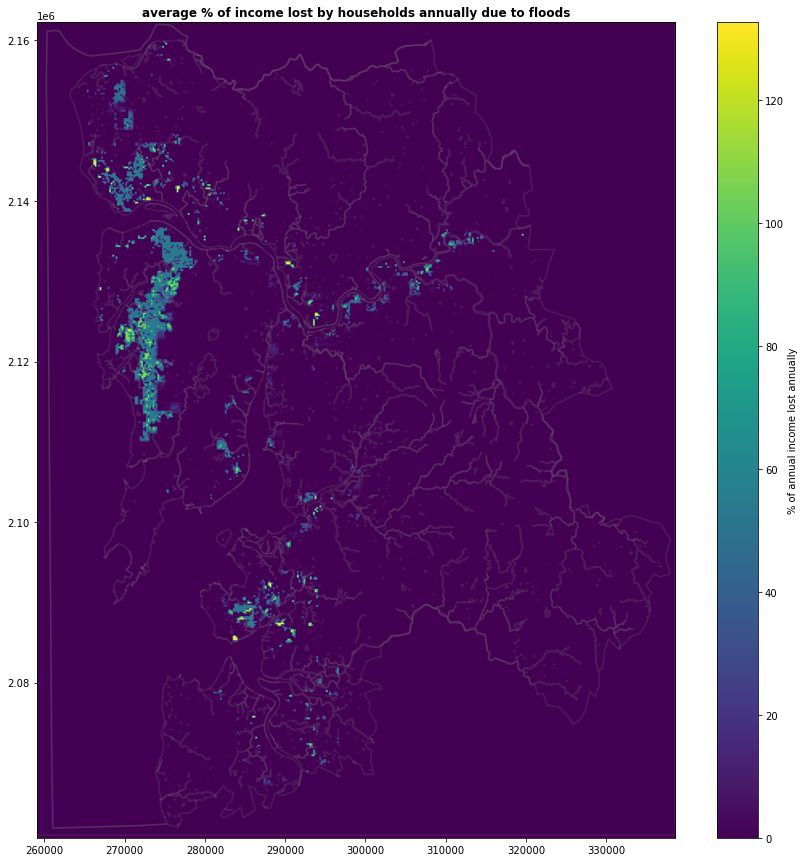

In [351]:
shapefile = geopandas.read_file('mmr_land_use_frame3.shp')
raster = rasterio.open(r"damage_test\aed_percentage.tif")
fig, ax = plt.subplots(figsize=(15, 15))
rasterio.plot.show(raster, ax=ax,cmap="viridis",title='average % of income lost by households annually due to floods')
shapefile.plot(ax=ax, facecolor='none', edgecolor='grey', alpha=0.2)
#plot = ax.pcolor(raster_path)
cbar=plt.colorbar(plot,ax=ax)
cbar.set_label('% of annual income lost annually')
plt.savefig('income_lost.png')

## High

In [525]:
func_spat_expl_lost_annual_income(r'mmr_landuse_2016_final.tif',r'combined_rasters\high',r'damage_test\aed_percentage_high')

0
1
2
3
4
5
6
7
8


In [526]:
raster_path=r"damage_test\aed_percentage_high.tif"
with rio.open(raster_path) as dem_src:
    raster = dem_src.read(1) 

In [527]:
q1=np.amin(raster)
q2=np.amax(raster)
plot = ax.pcolor(raster)

In [528]:
q1

0.0

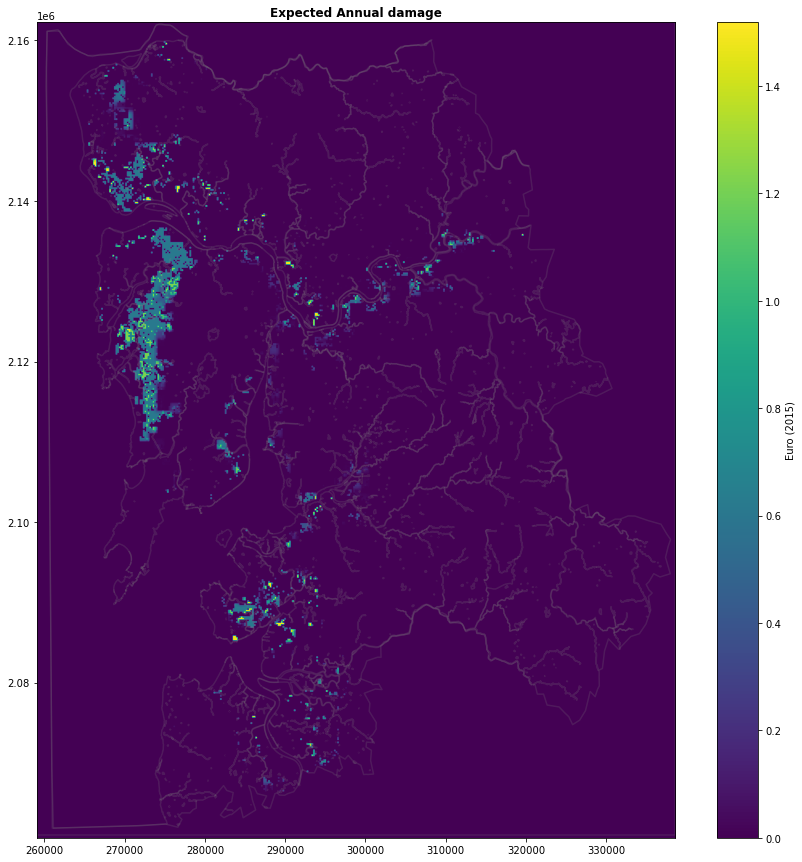

In [529]:
shapefile = geopandas.read_file('mmr_land_use_frame3.shp')
raster = rasterio.open(r"damage_test\aed_percentage_high.tif")
fig, ax = plt.subplots(figsize=(15, 15))
rasterio.plot.show(raster, ax=ax,cmap="viridis",title='Expected Annual damage')
shapefile.plot(ax=ax, facecolor='none', edgecolor='grey', alpha=0.2)
#plot = ax.pcolor(raster_path)
cbar=plt.colorbar(plot,ax=ax)
cbar.set_label('Euro (2015)')

## People affected

### spatially explicitly

In [11]:
def func_spat_expl_people_affected(lu_file_path,climate_folder,output_name):    
    with rio.open(lu_file_path) as dem_src:
        luc=gdal.Open(lu_file_path)
        projection = luc.GetProjection()
        geotrans = luc.GetGeoTransform()
    dam_all_rp=[]
    for y in range(506):
        b= []
        for x in range(398):
            b.append([0,0,0,0,0,0,0,0,0])
        dam_all_rp.append(b)
    damage_raster=[]
    for y in range(506):
        b= []
        for x in range(398):
            b.append(0)
        damage_raster.append(b)
    for count,file in enumerate(winsort(os.listdir(climate_folder))):
        file_path=os.path.join(climate_folder,file)
        print(count)
        with rio.open(file_path) as dem_src:
            flood = dem_src.read(1)
            for i in range(len(luc_mmr)):
                for j in range(len(luc_mmr[1])):
                    if flood[i][j]>0:
                        D=flood[i][j]
                        if luc_mmr[i][j]==5:#urban-formal
                            y=(4*10**4)/(1*10**6)*37*10**3
                            dam_all_rp[i][j][count]=y
                            if count==8:
                                damage=dam_all_rp[i][j]
                                damage.reverse()
                                aep=[0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5]
                                rc=(damage[-1]-damage[-2])/(aep[-1]-aep[-2])
                                aep=[0,0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5,1]
                                damage.append(max(0,damage[-1]+rc*((aep[-1]-aep[-2])))) #damage at p=1
                                damage.insert(0,1.5*damage[1])
                                ead=auc(aep,damage)
                                damage_raster[i][j]=ead                            
                        elif luc_mmr[i][j]==6:#urban-informal
                            y=(4*10**4)/(1*10**6)*47*10**3
                            dam_all_rp[i][j][count]=y
                            if count==8:
                                damage=dam_all_rp[i][j]
                                damage.reverse()
                                aep=[0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5]
                                rc=(damage[-1]-damage[-2])/(aep[-1]-aep[-2])
                                aep=[0,0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5,1]
                                damage.append(max(0,damage[-1]+rc*((aep[-1]-aep[-2])))) #damage at p=1
                                damage.insert(0,1.5*damage[1])
                                ead=auc(aep,damage)
                                damage_raster[i][j]=ead
                        elif luc_mmr[i][j]==7:#urban-villages
                            y=(4*10**4)/(1*10**6)*34*10**3
                            dam_all_rp[i][j][count]=y
                            if count==8:
                                damage=dam_all_rp[i][j]
                                damage.reverse()
                                aep=[0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5]
                                rc=(damage[-1]-damage[-2])/(aep[-1]-aep[-2])
                                aep=[0,0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5,1]
                                damage.append(max(0,damage[-1]+rc*((aep[-1]-aep[-2])))) #damage at p=1
                                damage.insert(0,1.5*damage[1])
                                ead=auc(aep,damage)
                                damage_raster[i][j]=ead
    damage_raster=np.array(damage_raster)
    for i in range(len(damage_raster)):
        for j in range(len(damage_raster[1])):
            if damage_raster[i][j]!=0:
                damage_raster[i][j]=np.log10(damage_raster[i][j])
    outputPath = os.path.join(output_name+'.tif')
    cv2.imwrite(outputPath, damage_raster)
    dataset2 = gdal.Open(outputPath, gdal.GA_Update)
    dataset2.SetGeoTransform(geotrans)
    dataset2.SetProjection(projection)

### low

In [12]:
func_spat_expl_people_affected(r'mmr_landuse_2016_final.tif',r'combined_rasters\low',r'damage_test\aed_low_people')

0
1
2
3
4
5
6
7
8


In [13]:
raster_path=r"damage_test\aed_low_people.tif"
with rio.open(raster_path) as dem_src:
    raster = dem_src.read(1) 

In [14]:
raster2=raster

In [15]:
for i in range(len(raster)):
    for j in range(len(raster[1])):
        raster2[i][j]=10**raster2[i][j]

In [18]:
q1=np.amin(raster2)
q2=np.amax(raster2)
plot = ax.pcolor(raster2, norm=colors.LogNorm(vmin=q1, vmax=q2))

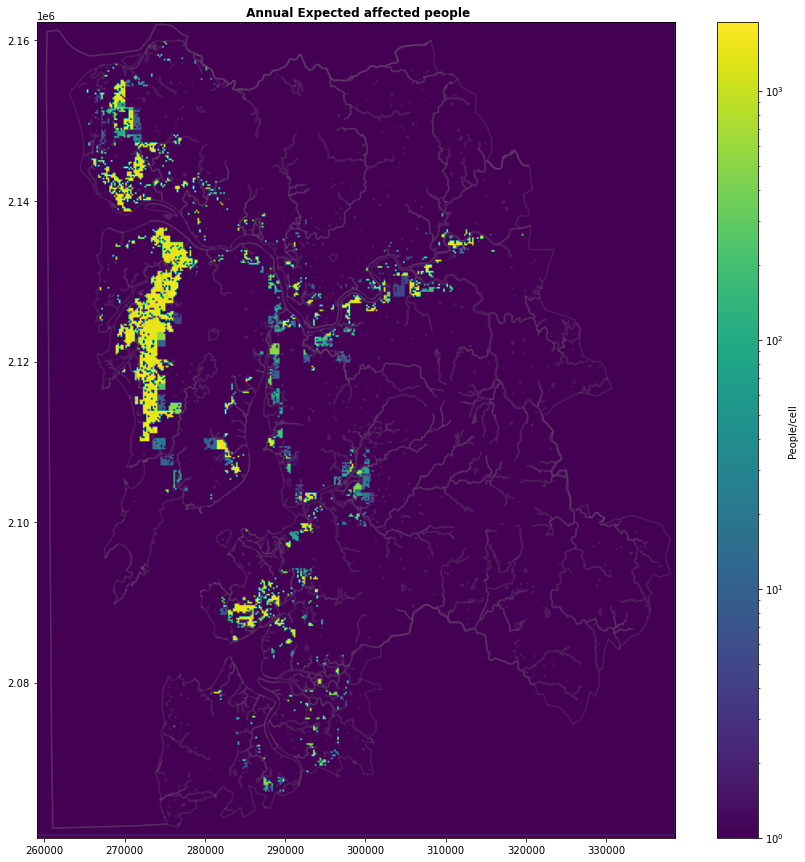

In [22]:
shapefile = geopandas.read_file('mmr_land_use_frame3.shp')
raster = rasterio.open(r"damage_test\aed_low_people.tif")
fig, ax = plt.subplots(figsize=(15, 15))
rasterio.plot.show(raster, ax=ax,cmap="viridis",title=' Annual Expected affected people')
shapefile.plot(ax=ax, facecolor='none', edgecolor='grey', alpha=0.2)
#plot = ax.pcolor(raster_path)
cbar=plt.colorbar(plot,ax=ax)
cbar.set_label('People/cell')
plt.savefig('Annual expected affected people.png')

### High

In [393]:
func_spat_expl_people_affected(r'mmr_landuse_2016_final.tif',r'combined_rasters\high',r'damage_test\aed_high_people')

0
1
2
3
4
5
6
7
8


In [394]:
raster_path=r"damage_test\aed_high_people.tif"
with rio.open(raster_path) as dem_src:
    raster = dem_src.read(1) 

In [395]:
raster2=raster

In [396]:
for i in range(len(raster)):
    for j in range(len(raster[1])):
        raster2[i][j]=10**raster2[i][j]

In [397]:
q1=np.amin(raster2)
q2=np.amax(raster2)
plot = ax.pcolor(raster2, norm=colors.LogNorm(vmin=q1, vmax=q2))

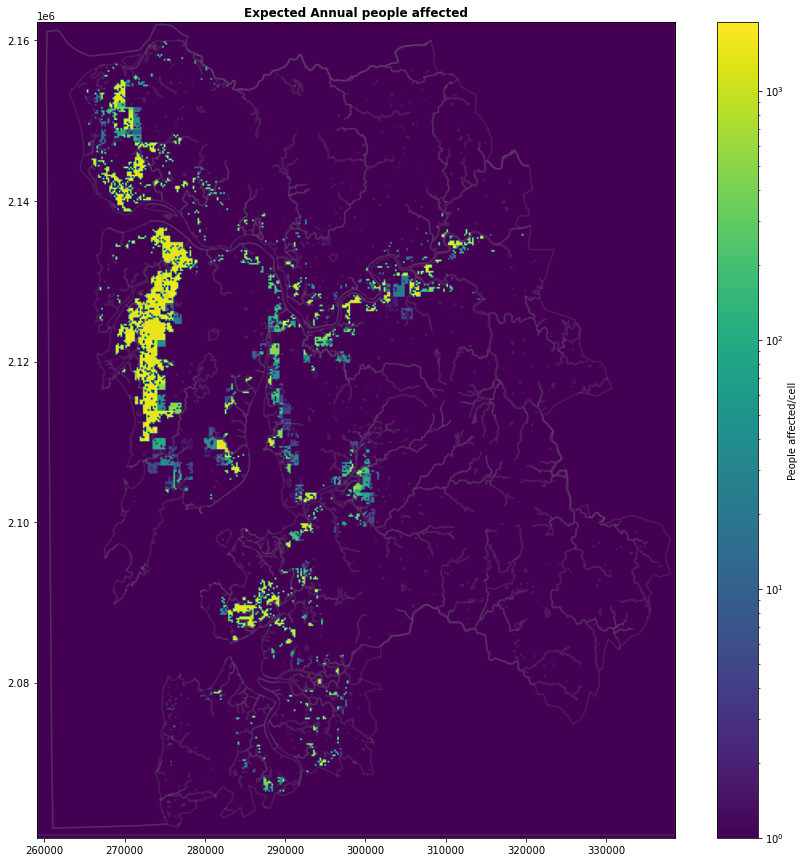

In [399]:
shapefile = geopandas.read_file('mmr_land_use_frame3.shp')
raster = rasterio.open(r"damage_test\aed_high_people.tif")
fig, ax = plt.subplots(figsize=(15, 15))
rasterio.plot.show(raster, ax=ax,cmap="viridis",title='Expected Annual people affected')
shapefile.plot(ax=ax, facecolor='none', edgecolor='grey', alpha=0.2)
#plot = ax.pcolor(raster_path)
cbar=plt.colorbar(plot,ax=ax)
cbar.set_label('People affected/cell')

# total amount

In [361]:
def func_calculate_people(folder):    
    total_form_affected=[0,0,0,0,0,0,0,0,0]
    total_inf_affected=[0,0,0,0,0,0,0,0,0]
    total_vil_affected=[0,0,0,0,0,0,0,0,0]
    total_affected=[0,0,0,0,0,0,0,0,0]

    for count,file in enumerate(winsort(os.listdir(folder))):
        file_path=os.path.join(folder,file)
        print(file)
        with rio.open(file_path) as dem_src:
            flood = dem_src.read(1)
        
        urb_for_affected=[0]
        urb_inf_affected=[0]
        urb_vil_affected=[0]

        for i in range(len(luc_mmr)):
            for j in range(len(luc_mmr[1])):
                if flood[i][j]>0:
                    if luc_mmr[i][j]==5:#urban-formal
                        y=(4*10**4)/(1*10**6)*37*10**3
                        urb_for_affected[0]=urb_for_affected[0]+y

                    elif luc_mmr[i][j]==6:#urban-informal
                        y=(4*10**4)/(1*10**6)*47*10**3
                        urb_inf_affected[0]=urb_inf_affected[0]+y

                    elif luc_mmr[i][j]==7:#urban-villages
                        y=(4*10**4)/(1*10**6)*34*10**3
                        urb_vil_affected[0]=urb_vil_affected[0]+y
        total_form_affected[count]=urb_for_affected[0]
        total_inf_affected[count]=urb_inf_affected[0]
        total_vil_affected[count]=urb_vil_affected[0]
        total_affected[count]=total_form_affected[count]+total_inf_affected[count]+total_vil_affected[count]
    return total_affected

### Low

In [362]:
total_affected=func_calculate_people(r'combined_rasters\low')

avg_models_low_2.tif
avg_models_low_5.tif
avg_models_low_10.tif
avg_models_low_25.tif
avg_models_low_50.tif
avg_models_low_100.tif
avg_models_low_250.tif
avg_models_low_500.tif
avg_models_low_1000.tif


In [363]:
total_affected.reverse()

In [364]:
annual_exceedance_prob=[0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5]

In [365]:
rc=(total_affected[-1]-total_affected[-2])/(annual_exceedance_prob[-1]-annual_exceedance_prob[-2])

In [366]:
annual_exceedance_prob=[0,0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5,1]

In [367]:
total_affected.append(total_affected[-1]+rc*((annual_exceedance_prob[-1]-annual_exceedance_prob[-2]))) #damage at p=1


In [368]:
total_affected.insert(0,1.5*total_affected[1]) #damage at p=0

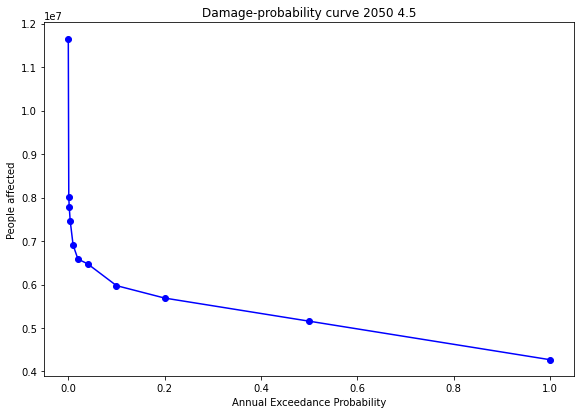

In [369]:
fig, ax = plt.subplots()
plt.scatter(annual_exceedance_prob,total_affected, color="blue")
plt.plot(annual_exceedance_prob,total_affected, color="blue")
#ax.plot(flood_depth, damage_func2, linewidth=2.0)
#ax.plot(flood_depth, damage_func3, linewidth=2.0)
#ax.plot(flood_depth, damage_func4, linewidth=2.0)
#ax.set(xlim=(0, 6), xticks=np.arange(1, 8),
#       ylim=(0, 600), yticks=np.arange(0, 600,30))
#ax.legend(['Logarithmic fit: Y=' + str(round(normal_fit[0],2))+'*log(flood_depth)^2 +'+str(round(normal_fit[1],2))+'*log(flood_depth) +' + str(round(normal_fit[2],2)),
#           'Upper-bound fit: Y=' + str(round(upper_fit[0],2))+'*log(flood_depth)^2 +'+str(round(upper_fit[1],2))+'*log(flood_depth) +' + str(round(upper_fit[2],2)),
#           'Lower-bound fit: Y=Max(0,' + str(round(lower_fit[0],2))+'*log(flood_depth)^2 +'+str(round(lower_fit[1],2))+'*log(flood_depth) +' + str(round(lower_fit[2],2))+')'],loc=2)
plt.xlabel("Annual Exceedance Probability")
plt.ylabel("People affected")
plt.title("Damage-probability curve 2050 4.5")
fig.set_size_inches(9.5, 6.5)
#fig.savefig('damage_curve_trans.png', dpi=100)
plt.show()

In [802]:
print("expected AED is",auc(annual_exceedance_prob,total_affected))

expected AED is 5214305.966666667


### High

In [803]:
total_affected=func_calculate_people(r'combined_rasters\high')

avg_models_high_2.tif
avg_models_high_5.tif
avg_models_high_10.tif
avg_models_high_25.tif
avg_models_high_50.tif
avg_models_high_100.tif
avg_models_high_250.tif
avg_models_high_500.tif
avg_models_high_1000.tif


In [804]:
total_affected.reverse()

In [805]:
annual_exceedance_prob=[0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5]

In [806]:
rc=(total_affected[-1]-total_affected[-2])/(annual_exceedance_prob[-1]-annual_exceedance_prob[-2])

In [807]:
annual_exceedance_prob=[0,0.001,0.002,0.004,0.01,0.02,0.04,0.1,0.2,0.5,1]

In [808]:
total_affected.append(total_affected[-1]+rc*((annual_exceedance_prob[-1]-annual_exceedance_prob[-2]))) #damage at p=1


In [809]:
total_affected.insert(0,1.5*total_affected[1]) #damage at p=0

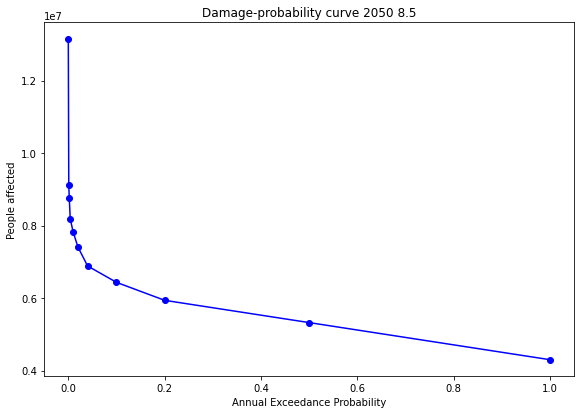

In [812]:
fig, ax = plt.subplots()
plt.scatter(annual_exceedance_prob,total_affected, color="blue")
plt.plot(annual_exceedance_prob,total_affected, color="blue")
#ax.plot(flood_depth, damage_func2, linewidth=2.0)
#ax.plot(flood_depth, damage_func3, linewidth=2.0)
#ax.plot(flood_depth, damage_func4, linewidth=2.0)
#ax.set(xlim=(0, 6), xticks=np.arange(1, 8),
#       ylim=(0, 600), yticks=np.arange(0, 600,30))
#ax.legend(['Logarithmic fit: Y=' + str(round(normal_fit[0],2))+'*log(flood_depth)^2 +'+str(round(normal_fit[1],2))+'*log(flood_depth) +' + str(round(normal_fit[2],2)),
#           'Upper-bound fit: Y=' + str(round(upper_fit[0],2))+'*log(flood_depth)^2 +'+str(round(upper_fit[1],2))+'*log(flood_depth) +' + str(round(upper_fit[2],2)),
#           'Lower-bound fit: Y=Max(0,' + str(round(lower_fit[0],2))+'*log(flood_depth)^2 +'+str(round(lower_fit[1],2))+'*log(flood_depth) +' + str(round(lower_fit[2],2))+')'],loc=2)
plt.xlabel("Annual Exceedance Probability")
plt.ylabel("People affected")
plt.title("Damage-probability curve 2050 8.5")
fig.set_size_inches(9.5, 6.5)
#fig.savefig('damage_curve_trans.png', dpi=100)
plt.show()

In [813]:
print("expected AED is",auc(annual_exceedance_prob,total_affected))

expected AED is 5420896.890000001


## Fitting

In [396]:
# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)

In [425]:
# Function to calculate the power-law with constants a and b
def rational(x, a, b,c,d):
    return (a)/(d*x-b)+c

In [449]:
# Function to calculate the power-law with constants a and b
def logarithm(x, a,b):
    return -a*np.log(x)+b

In [457]:
# Function to calculate the power-law with constants a and b
def power_law_2(x, a, b,c):
    return a+b**(-c*x)

In [447]:
from scipy.optimize import curve_fit
range_1=np.arange(0.0001,0.5,0.0001)

In [448]:
pars1, cov1 = curve_fit(f=logarithm, xdata=annual_exceedance_prob, ydata=total_damage_low)

<ipython-input-446-98d71559ef87>:3: RuntimeWarning: invalid value encountered in log
  return -a*np.log(x-b)+c


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [453]:
pars1, cov1 = curve_fit(f=power_law_2, xdata=annual_exceedance_prob, ydata=total_damage_low)

In [ ]:
pars1, cov1 = curve_fit(f=power_law, xdata=annual_exceedance_prob, ydata=total_damage_low)

In [432]:
pars1, cov1 = curve_fit(f=power_law2, xdata=annual_exceedance_prob, ydata=total_damage_low)

<ipython-input-431-2c8a68a93ed0>:3: RuntimeWarning: invalid value encountered in power
  return a*np.power((1/b), x)


In [426]:
pars1, cov1 = curve_fit(f=rational, xdata=annual_exceedance_prob, ydata=total_damage_low)

In [403]:
y_1_1=pars1[0]*range_1**pars1[1]

In [427]:
y_1_2=(pars1[0])/(pars1[3]*range_1-pars1[1])+pars1[2]

In [442]:
y_1_3=-pars1[0]*np.log(range_1)+pars1[1]

In [458]:
y_1_4=pars1[0]+pars1[1]*np.exp(-pars1[2]*range_1)

ValueError: The lengths of the data (11) and the error 9 do not match

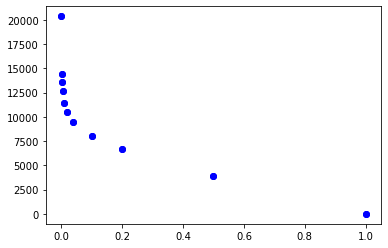

In [484]:
fig, ax = plt.subplots()
plt.scatter(annual_exceedance_prob,total_damage_low, color="blue")
plt.errorbar(annual_exceedance_prob,total_damage_low,yerr=uncertainties, fmt="o", color="blue")
plt.plot(range_1, y_1_3,color="orange")
#plt.plot(range_1, upper,color="black")
#plt.plot(range_1, lower, color="green")
#ax.plot(flood_depth, damage_func2, linewidth=2.0)
#ax.plot(flood_depth, damage_func3, linewidth=2.0)
#ax.plot(flood_depth, damage_func4, linewidth=2.0)
#ax.set(xlim=(0, 6), xticks=np.arange(1, 8),
#       ylim=(0, 600), yticks=np.arange(0, 600,30))
#ax.legend(['Logarithmic fit: Y=' + str(round(normal_fit[0],2))+'*log(flood_depth)^2 +'+str(round(normal_fit[1],2))+'*log(flood_depth) +' + str(round(normal_fit[2],2)),
#           'Upper-bound fit: Y=' + str(round(upper_fit[0],2))+'*log(flood_depth)^2 +'+str(round(upper_fit[1],2))+'*log(flood_depth) +' + str(round(upper_fit[2],2)),
#           'Lower-bound fit: Y=Max(0,' + str(round(lower_fit[0],2))+'*log(flood_depth)^2 +'+str(round(lower_fit[1],2))+'*log(flood_depth) +' + str(round(lower_fit[2],2))+')'],loc=2)
#plt.xlabel("Flood depth [m]")
#plt.ylabel("Damage [Euro/m^2]")
#plt.title("Transportation")
fig.set_size_inches(9.5, 6.5)
#fig.savefig('damage_curve_trans.png', dpi=100)
plt.show()

#range_1=np.arange(0,15000,1)
p = np.polyfit(annual_exceedance_prob, np.log(total_damage_low), 1)

In [369]:
a = np.exp(p[1])
b = p[0]
x_fitted = np.linspace(np.min(annual_exceedance_prob), np.max(annual_exceedance_prob), 100)
y_fitted = a * np.exp(b * x_fitted)

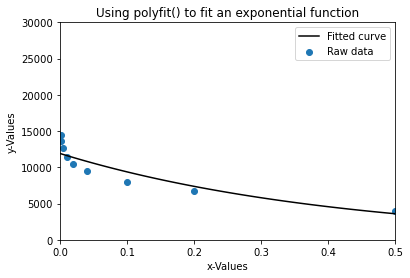

In [371]:
import matplotlib.pyplot as plt

ax = plt.axes()
ax.scatter(annual_exceedance_prob, total_damage_low, label='Raw data')
ax.plot(x_fitted, y_fitted, 'k', label='Fitted curve')
ax.set_title('Using polyfit() to fit an exponential function')
ax.set_ylabel('y-Values')
ax.set_xlim(0,0.5)
ax.set_ylim(0, 30000)
ax.set_xlabel('x-Values')
ax.legend()

In [299]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer


np.random.seed(123)

In [301]:
total_damage_low

[14412.578696580791,
 13577.973385511512,
 12653.685428345107,
 11451.482575102194,
 10516.017827776252,
 9456.766389587126,
 7977.327460072245,
 6695.514539040016,
 3912.22321464204]

In [302]:
annual_exceedance_prob

[0.001, 0.002, 0.004, 0.01, 0.02, 0.04, 0.1, 0.2, 0.5]

In [ ]:
y = a * np.exp(b * x) + c

In [305]:
# General Functions
def func_exp(x, a, b, c):
    """Return values from a general exponential function."""
    return a * np.exp(b * x) + c


def func_log(x, a, b, c):
    """Return values from a general log function."""
    return a * np.log(b * x) + c


# Helper
def generate_data(func, *args, jitter=0):
    """Return a tuple of arrays with random data along a general function."""
    xs = np.linspace(1, 5, 50)
    ys = func(xs, *args)
    noise = jitter * np.random.normal(size=len(xs)) + jitter
    xs = xs.reshape(-1, 1)                                  # xs[:, np.newaxis]
    ys = (ys + noise).reshape(-1, 1)
    return xs, ys

In [307]:
transformer = FunctionTransformer(np.log, validate=True)

In [317]:
tdl_fit=[]
for y in range(len(total_damage_low)):
    tdl_fit.append([total_damage_low[y]])

In [324]:
aep_fit=[]
for y in range(len(total_damage_low)):
    aep_fit.append([annual_exceedance_prob[y]])

In [344]:
range_1=np.arange(0,15000,1)

In [345]:
y=np.exp(-0.00061258*range_1)

Text(0.5, 1.0, 'Exponential Fit')

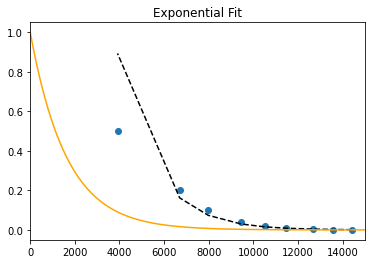

In [372]:
aep_fit2 = transformer.fit_transform(aep_fit)

# Regression
regressor = LinearRegression()
results = regressor.fit(tdl_fit, aep_fit2)                # 2
model = results.predict
y_fit = model(tdl_fit)

# Visualization
plt.scatter(tdl_fit, aep_fit)
plt.plot(tdl_fit, np.exp(y_fit), "k--", label="Fit")
plt.xlim([0, 15000])
plt.plot(range_1, y,color="orange")# 3
plt.title("Exponential Fit")

In [373]:
results.coef_

array([[-0.00061258]])

In [347]:
# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)

In [163]:
pars1, cov1 = curve_fit(f=power_law, xdata=flood_depth, ydata=damage_func2, p0=[0, 0], bounds=(-np.inf, np.inf))

Text(0.5, 1.0, 'Exponential Fit')

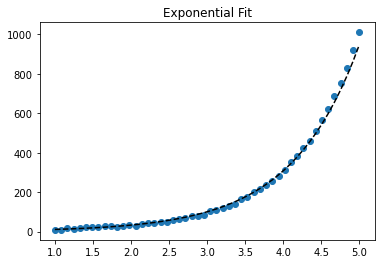

In [308]:
# Data
x_samp, y_samp = generate_data(func_exp, 2.5, 1.2, 0.7, jitter=3)
y_trans = transformer.fit_transform(y_samp)             # 1

# Regression
regressor = LinearRegression()
results = regressor.fit(x_samp, y_trans)                # 2
model = results.predict
y_fit = model(x_samp)

# Visualization
plt.scatter(x_samp, y_samp)
plt.plot(x_samp, np.exp(y_fit), "k--", label="Fit")     # 3
plt.title("Exponential Fit")

ValueError: Expected 2D array, got 1D array instead:
array=[14412.57869658 13577.97338551 12653.68542835 11451.4825751
 10516.01782778  9456.76638959  7977.32746007  6695.51453904
  3912.22321464].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [223]:
damage_indus=[0,0]
indus_unc=[0,0]
damage_urb_for=[0,0]
form_unc=[0,0]
damage_urb_inf=[0,0]
inf_unc=[0,0]
damage_urb_vil=[0,0]
vil_unc=[0,0]
damage_trans=[0,0]
trans_unc=[0,0]

for i in range(len(luc_mmr)):
    for j in range(len(luc_mmr[1])):
        if flood[i][j]>0:
            D=flood[i][j]
            if luc_mmr[i][j]==2:#industry
                y=4*10**4*(65.51*D**0.42)
                damage_indus[0]=damage_indus[0]+y/10**6
                damage_indus[1]=damage_indus[1]+1
                
                y_lower=y-4*10**4*(5.81*D**1.35)
                indus_unc[0]=indus_unc[0]+y_lower/10**6
                
                y_higher=4*10**4*(147.06*D**0.29)-y
                indus_unc[1]=indus_unc[1]+y_higher/10**6
                
            elif luc_mmr[i][j]==5:#urban-formal
                y=4*10**4*(35.18*D**0.4)
                damage_urb_for[0]=damage_urb_for[0]+y/10**6
                damage_urb_for[1]=damage_urb_for[1]+1
                
                y_lower=y-4*10**4*(4.64*D**1.14)
                form_unc[0]=form_unc[0]+y_lower/10**6
                
                y_higher=4*10**4*(77.13*D**0.28)-y
                form_unc[1]=form_unc[1]+y_higher/10**6
                
            elif luc_mmr[i][j]==6:#urban-informal
                y=4*10**4*(21.99*D**0.4)
                damage_urb_inf[0]=damage_urb_inf[0]+y/10**6
                damage_urb_inf[1]=damage_urb_inf[1]+1
                
                y_lower=y-4*10**4*(2.9*D**1.15)
                inf_unc[0]=inf_unc[0]+y_lower/10**6
                
                y_higher=4*10**4*(48.21*D**0.28)-y
                inf_unc[1]=inf_unc[1]+y_higher/10**6
                
            elif luc_mmr[i][j]==7:#urban-villages
                y=4*10**4*(19.35*D**0.4)
                damage_urb_vil[0]=damage_urb_vil[0]+y/10**6
                damage_urb_vil[1]=damage_urb_vil[1]+1
                
                y_lower=y-4*10**4*(2.53*D**1.15)
                vil_unc[0]=vil_unc[0]+y_lower/10**6
                
                y_higher=4*10**4*(42.46*D**0.28)-y
                vil_unc[1]=vil_unc[1]+y_higher/10**6
                
            elif luc_mmr[i][j]==8:#transportation
                y=4*10**4*(5.38*np.log(D)**2+89.58*np.log(D)+211.09)
                damage_trans[0]=damage_trans[0]+y/10**6
                damage_trans[1]=damage_trans[1]+1
                
                y_lower=y-4*10**4*(8.86*np.log(D)**2+129.79*np.log(D)+101.98)
                trans_unc[0]=trans_unc[0]+y_lower/10**6
                
                y_higher=4*10**4*(1.59*np.log(D)**2+49.37*np.log(D)+320.2)-y
                trans_unc[1]=trans_unc[1]+y_higher/10**6

In [224]:
print(damage_indus)
print(damage_urb_for)
print(damage_urb_inf)
print(damage_urb_vil)
print(damage_trans)

[554.5784592179047, 450]
[2016.3556153128714, 2638]
[208.61862910255084, 439]
[113.15231279036954, 314]
[1019.5181982183435, 318]


In [226]:
form_unc

[1916.006251584642, 3234.0416901226586]

## Rtozooi

In [170]:
def func_high_std(z,jaar):
    all_models=[]
    for y in range(508):
        b= []
        for x in range(398):
            b.append([0,0,0,0,0])
        all_models.append(b)
        
    mean_std=[]
    for y in range(508):
        b= []
        for x in range(398):
            b.append([0,0])
        mean_std.append(b)
    
    final=[]
    for y in range(508):
        b= []
        for x in range(398):
            b.append(0)
        final.append(b)
    final=np.array(final, dtype = float)

    for count, folder in enumerate(os.listdir(r'final_rasters\high')):
        folder2=os.path.join(r'final_rasters\high',folder)
        file=os.path.join(folder2,os.listdir(folder2)[z])
        print(file)
        if file.endswith('tif'):
            with rio.open(file) as dem_src:
                raster_file = dem_src.read(1)  
                for i in range(508):
                    for j in range(398):
                        all_models[i][j][count]=raster_file[i][j]
                        
    for i in range(508):
        for j in range(398):
            mean_std[i][j][0]=np.mean(all_models[i][j])
            mean_std[i][j][1]=np.std(all_models[i][j])

    for i in range(508):
        for j in range(398):
            final[i][j]=mean_std[i][j][0]+2*mean_std[i][j][1]
        
    with rio.open(r'mmr_landuse_2016_final.tif') as dem_src:
        raster = gdal.Open(file)
        projection = raster.GetProjection()
        geotrans = raster.GetGeoTransform()
    outputPath = os.path.join(r'combined_rasters','avg_models_high_'+ str(jaar) +'.tif')
    print(outputPath)
    cv2.imwrite(outputPath, final)
    dataset2 = gdal.Open(outputPath, gdal.GA_Update)
    dataset2.SetGeoTransform(geotrans)
    dataset2.SetProjection(projection)
    return final

In [171]:
avg_models_high_2=func_high(1,2)
avg_models_high_5=func_high(6,5)
avg_models_high_10=func_high(11,10)
avg_models_high_25=func_high(16,25)
avg_models_high_50=func_high(21,50)
avg_models_high_100=func_high(26,100)
avg_models_high_250=func_high(31,250)
avg_models_high_500=func_high(36,500)
avg_models_high_1000=func_high(41,1000)

final_rasters\high\model_5_high\inunriver_rcp8p5_MIROC-ESM-CHEM_2050_rp00002.tif
final_rasters\high\model_1_high\inunriver_rcp8p5_00000NorESM1-M_2050_rp00002.tif
final_rasters\high\model_2_high\inunriver_rcp8p5_0000GFDL-ESM2M_2050_rp00002.tif
final_rasters\high\model_3_high\inunriver_rcp8p5_0000HadGEM2-ES_2050_rp00002.tif
final_rasters\high\model_4_high\inunriver_rcp8p5_00IPSL-CM5A-LR_2050_rp00002.tif
combined_rasters\avg_models_high_2.tif
final_rasters\high\model_5_high\inunriver_rcp8p5_MIROC-ESM-CHEM_2050_rp00005.tif
final_rasters\high\model_1_high\inunriver_rcp8p5_00000NorESM1-M_2050_rp00005.tif
final_rasters\high\model_2_high\inunriver_rcp8p5_0000GFDL-ESM2M_2050_rp00005.tif
final_rasters\high\model_3_high\inunriver_rcp8p5_0000HadGEM2-ES_2050_rp00005.tif
final_rasters\high\model_4_high\inunriver_rcp8p5_00IPSL-CM5A-LR_2050_rp00005.tif
combined_rasters\avg_models_high_5.tif
final_rasters\high\model_5_high\inunriver_rcp8p5_MIROC-ESM-CHEM_2050_rp00010.tif
final_rasters\high\model_1_high

In [ ]:
def func_calculate_damage(folder):    
    for y in range(508):
        b= []
        for x in range(398):
            b.append([0,0,0,0,0,0,0,0,0])
        all_models.append(b)

    total_indus_unc=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
    total_for_unc=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
    total_inf_unc=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
    total_vil_unc=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
    total_trans_unc=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
    total_unc=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]

    for count,file in enumerate(winsort(os.listdir(folder))):
        file_path=os.path.join(folder,file)
        print(file)
        with rio.open(file_path) as dem_src:
            flood = dem_src.read(1)

        damage_indus=[0,0]
        indus_unc=[0,0]
        damage_urb_for=[0,0]
        form_unc=[0,0]
        damage_urb_inf=[0,0]
        inf_unc=[0,0]
        damage_urb_vil=[0,0]
        vil_unc=[0,0]
        damage_trans=[0,0]
        trans_unc=[0,0]

        for i in range(len(luc_mmr)):
            for j in range(len(luc_mmr[1])):
                if flood[i][j]>0:
                    D=flood[i][j]
                    if luc_mmr[i][j]==2:#industry
                        y=4*10**4*(65.51*D**0.42)
                        damage_indus[0]=damage_indus[0]+y/10**6
                        damage_indus[1]=damage_indus[1]+1

                        y_lower=y-4*10**4*(5.81*D**1.35)
                        indus_unc[0]=indus_unc[0]+y_lower/10**6

                        y_higher=4*10**4*(147.06*D**0.29)-y
                        indus_unc[1]=indus_unc[1]+y_higher/10**6

                    elif luc_mmr[i][j]==5:#urban-formal
                        y=4*10**4*(35.18*D**0.4)
                        damage_urb_for[0]=damage_urb_for[0]+y/10**6
                        damage_urb_for[1]=damage_urb_for[1]+1

                        y_lower=y-4*10**4*(4.64*D**1.14)
                        form_unc[0]=form_unc[0]+y_lower/10**6

                        y_higher=4*10**4*(77.13*D**0.28)-y
                        form_unc[1]=form_unc[1]+y_higher/10**6

                    elif luc_mmr[i][j]==6:#urban-informal
                        y=4*10**4*(21.99*D**0.4)
                        damage_urb_inf[0]=damage_urb_inf[0]+y/10**6
                        damage_urb_inf[1]=damage_urb_inf[1]+1

                        y_lower=y-4*10**4*(2.9*D**1.15)
                        inf_unc[0]=inf_unc[0]+y_lower/10**6

                        y_higher=4*10**4*(48.21*D**0.28)-y
                        inf_unc[1]=inf_unc[1]+y_higher/10**6

                    elif luc_mmr[i][j]==7:#urban-villages
                        y=4*10**4*(19.35*D**0.4)
                        damage_urb_vil[0]=damage_urb_vil[0]+y/10**6
                        damage_urb_vil[1]=damage_urb_vil[1]+1

                        y_lower=y-4*10**4*(2.53*D**1.15)
                        vil_unc[0]=vil_unc[0]+y_lower/10**6

                        y_higher=4*10**4*(42.46*D**0.28)-y
                        vil_unc[1]=vil_unc[1]+y_higher/10**6

                    elif luc_mmr[i][j]==8:#transportation
                        y=4*10**4*(5.38*np.log(D)**2+89.58*np.log(D)+211.09)
                        damage_trans[0]=damage_trans[0]+y/10**6
                        damage_trans[1]=damage_trans[1]+1

                        y_lower=y-4*10**4*(max(0,8.86*np.log(D)**2+129.79*np.log(D)+101.98))
                        trans_unc[0]=trans_unc[0]+y_lower/10**6

                        y_higher=4*10**4*(1.59*np.log(D)**2+49.37*np.log(D)+320.2)-y
                        trans_unc[1]=trans_unc[1]+y_higher/10**6
        total_damage_indus[count]=damage_indus[0]
        total_indus_unc[count][0]=indus_unc[0]
        total_indus_unc[count][1]=indus_unc[1]

        total_damage_urb_for[count]=damage_urb_for[0]
        total_for_unc[count][0]=form_unc[0]
        total_for_unc[count][1]=form_unc[1]


        total_damage_urb_inf[count]=damage_urb_inf[0]
        total_inf_unc[count][0]=inf_unc[0]
        total_inf_unc[count][1]=inf_unc[1]

        total_damage_urb_vil[count]=damage_urb_vil[0]
        total_vil_unc[count][0]=vil_unc[0]
        total_vil_unc[count][1]=vil_unc[1]

        total_damage_trans[count]=damage_trans[0]
        total_trans_unc[count][0]=trans_unc[0]
        total_trans_unc[count][1]=trans_unc[1]

        total_damage[count]=total_damage_indus[count]+total_damage_urb_for[count]+total_damage_urb_inf[count]+total_damage_urb_vil[count]+total_damage_trans[count]
        total_unc[count][0]=total_indus_unc[count][0]+total_for_unc[count][0]+total_inf_unc[count][0]+total_vil_unc[count][0]+total_trans_unc[count][0]
        total_unc[count][1]=total_indus_unc[count][1]+total_for_unc[count][1]+total_inf_unc[count][1]+total_vil_unc[count][1]+total_trans_unc[count][1]
    return total_damage,total_unc